# Scratchpad for *An introduction to Statistical Learning*

Book [homepage](http://www-bcf.usc.edu/~gareth/ISL/) and [downloadable pdf](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)

In [1]:
# install.packages(c("ISLR", "MASS", "leaps", "glmnet", "pls"))

In [179]:
suppressWarnings(suppressMessages(library("sm")));
suppressMessages(library("vioplot"));
suppressMessages(library("ISLR"));
suppressMessages(library("MASS"));
suppressMessages(library(leaps));
suppressMessages(library(class));
suppressMessages(library(boot));
suppressMessages(library(glmnet));
suppressMessages(library(pls));

## Chapter 1

### Wage dataset

In [3]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

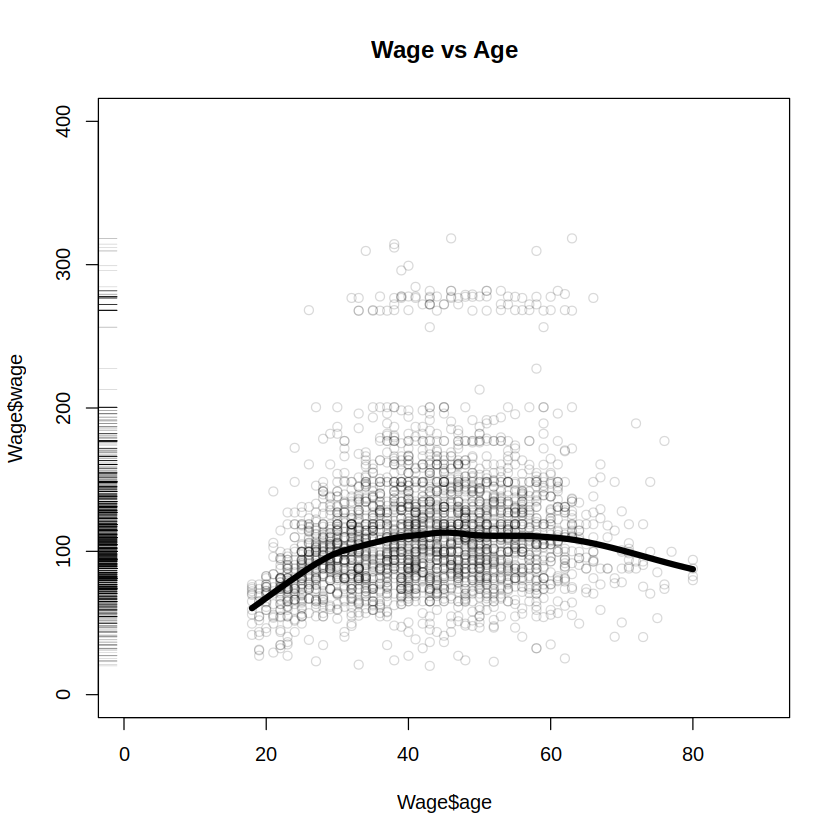

In [4]:
scatter.smooth(Wage$age, Wage$wage, span=0.3, col=rgb(0,0,0,0.15), lpars=list(lwd=5), ylim=c(0,400), xlim=c(0,90)); rug(Wage$wage,side=2, col=rgb(0,0,0,.2));
title("Wage vs Age")

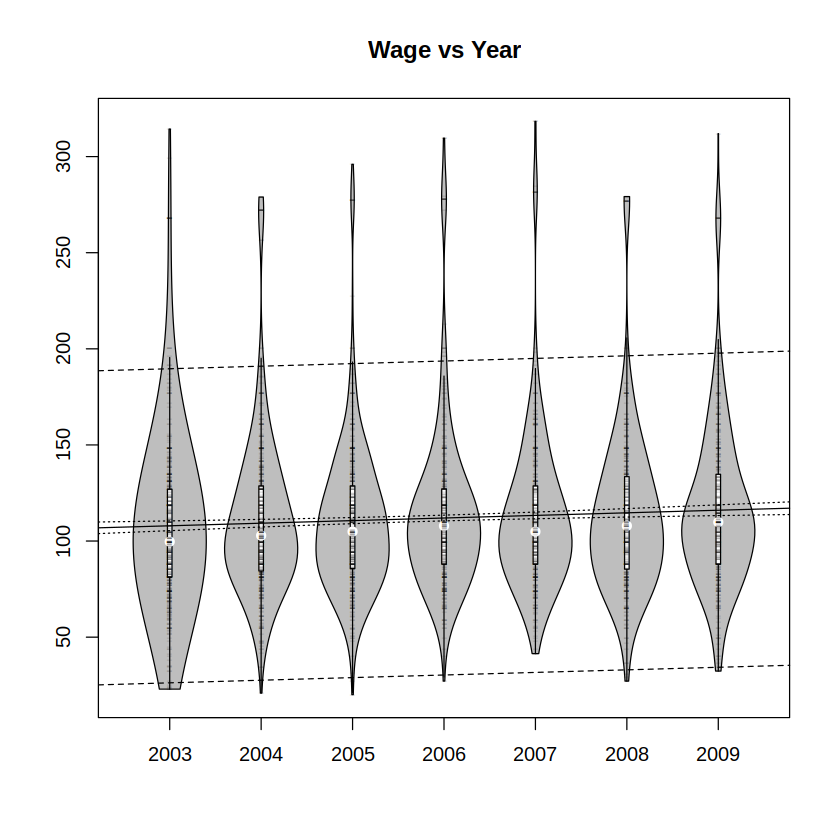

In [5]:
# violin plot
l <- by(Wage$wage, Wage$year, function(x) {x});
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(year), Wage, pch='-', col=rgb(0,0,0,0.1));
title("Wage vs Year")

# linear model with confidence interval
fyear <- as.numeric(as.factor(Wage$year)); # rescale year to match violin plot x-axis
m <- lm(wage ~ fyear, Wage);
xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(fyear=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(fyear=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

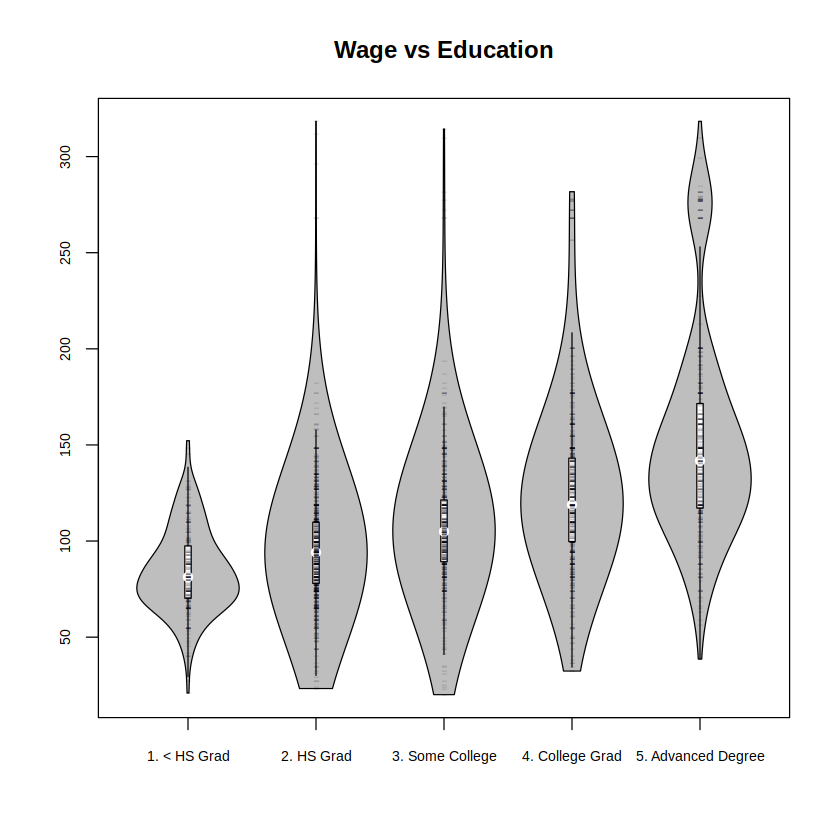

In [6]:

l = by(Wage$wage, Wage$education, function(x) {x});
par(cex.axis=0.70)
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(education), Wage, pch='-', col=rgb(0,0,0,0.1))
title("Wage vs Education")

### Smarket Dataset

In [7]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

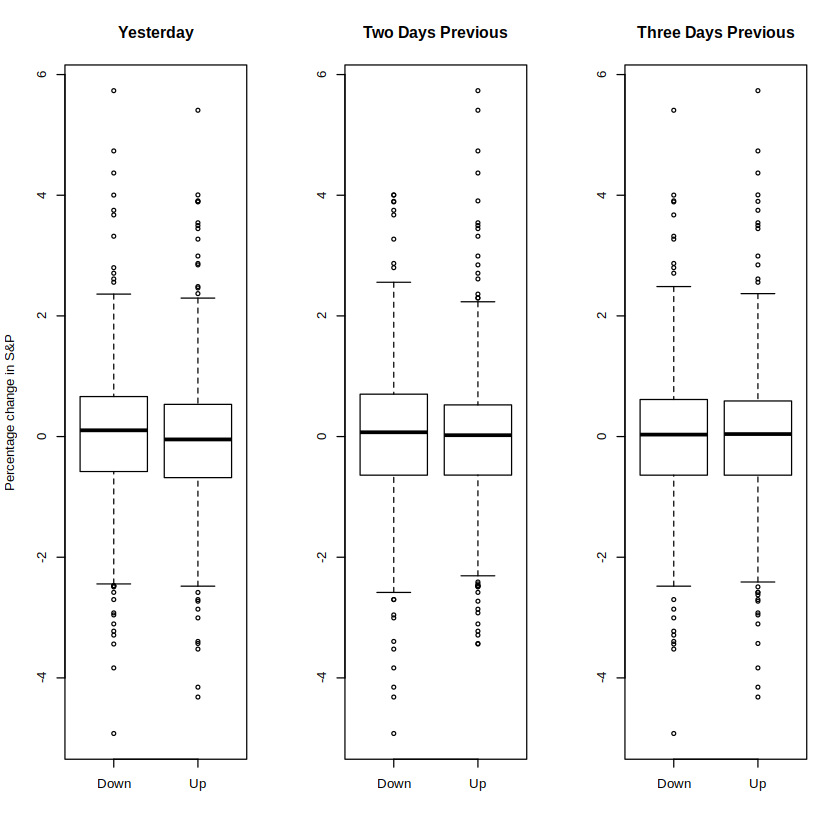

In [8]:
par(mfcol=c(1,3))
boxplot(Lag1 ~ Direction, Smarket, ylab="Percentage change in S&P"); title("Yesterday");
boxplot(Lag2 ~ Direction, Smarket); title("Two Days Previous");
boxplot(Lag3 ~ Direction, Smarket); title("Three Days Previous");

### NCI60 dataset

In [9]:
summary(NCI60)

     Length Class  Mode     
data 437120 -none- numeric  
labs     64 -none- character

In [10]:
pca<-prcomp(t(NCI60$data), scale=T, center=T)

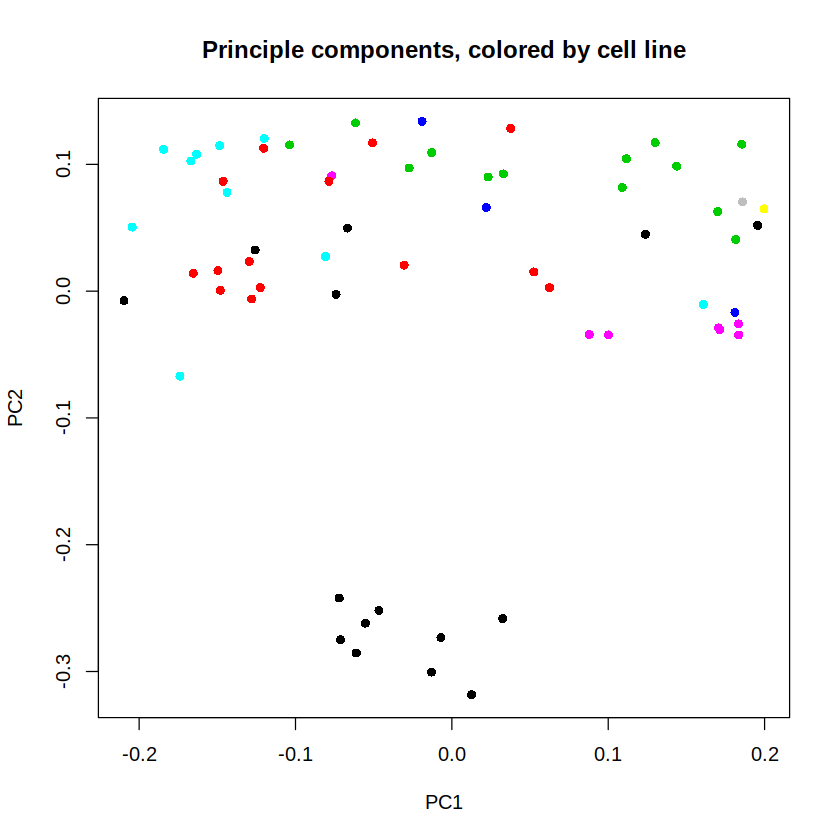

In [11]:
plot(pca$rotation[,1:2], col=as.factor(NCI60$labs), pch=16, main="Principle components, colored by cell line")

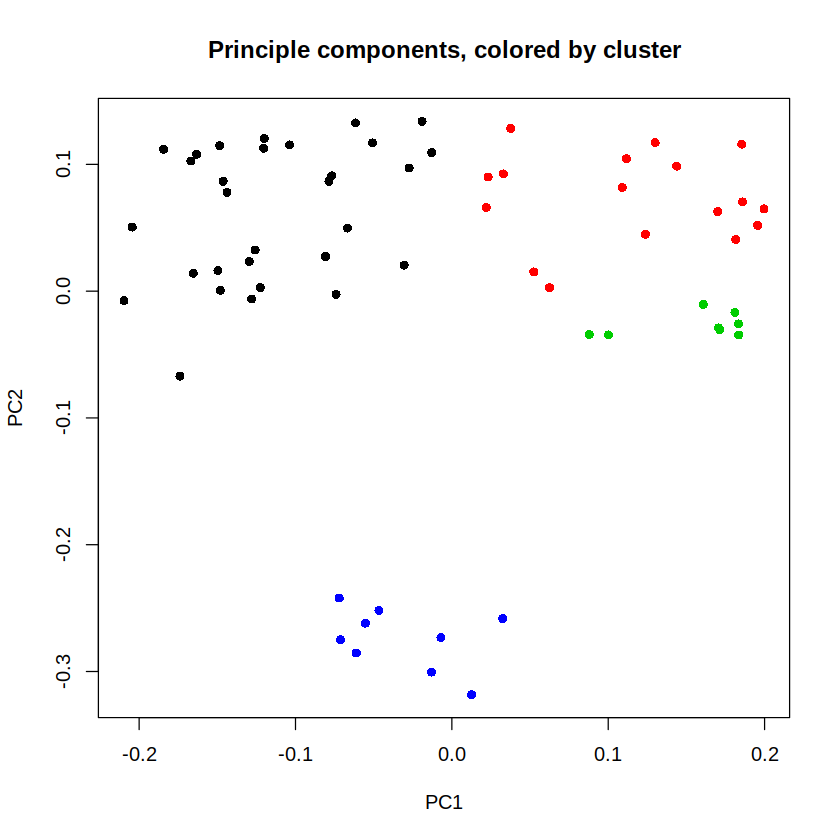

In [12]:
set.seed(20180403) # kmeans clustering uses a random number, so let's ensure reproducability
k <- kmeans(NCI60$data, 4, nstart=4)
plot(pca$rotation[,1:2], col=k$cluster, pch=16, main=("Principle components, colored by cluster"))

## Chapter 2

### lab

In [13]:
matrix(1:15, 3, 5)

[,1] [,2] [,3] [,4] [,5]
[1,] 1    4    7    10   13  
[2,] 2    5    8    11   14  
[3,] 3    6    9    12   15

In [14]:
matrix(1:15, 3, 5, byrow=T)

[,1] [,2] [,3] [,4] [,5]
[1,]  1    2    3    4    5  
[2,]  6    7    8    9   10  
[3,] 11   12   13   14   15

In [15]:
seq(-1,1,length=7)

[1] -1.0000000 -0.6666667 -0.3333333  0.0000000  0.3333333  0.6666667  1.0000000

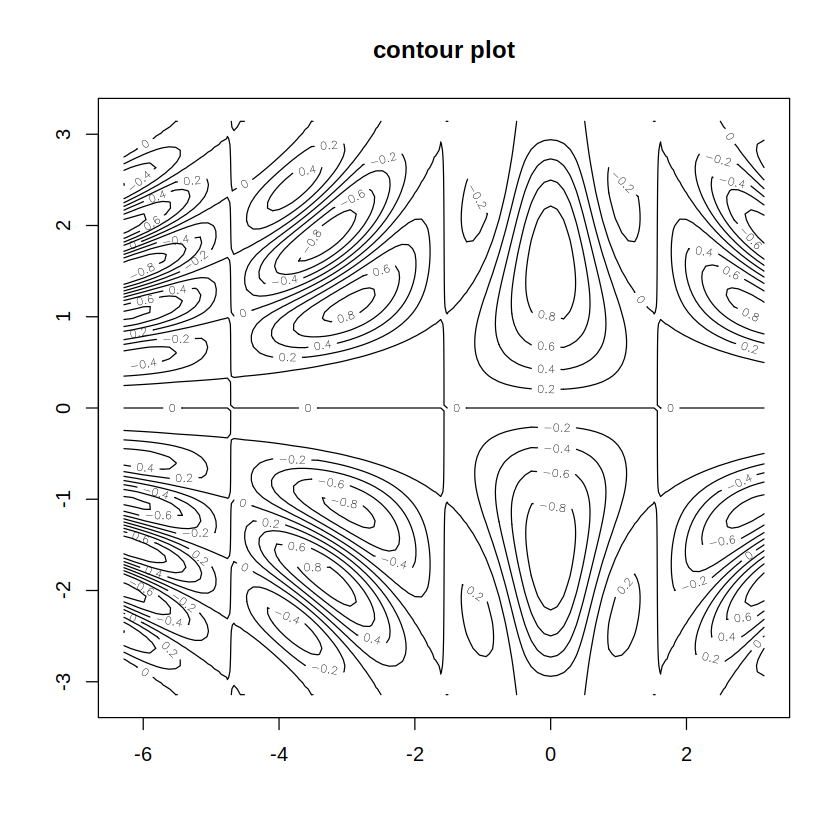

In [16]:
x<-seq(-2*pi, pi, length=100);
y<-seq(-pi, pi, length=100);
contour(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y)), main="contour plot");

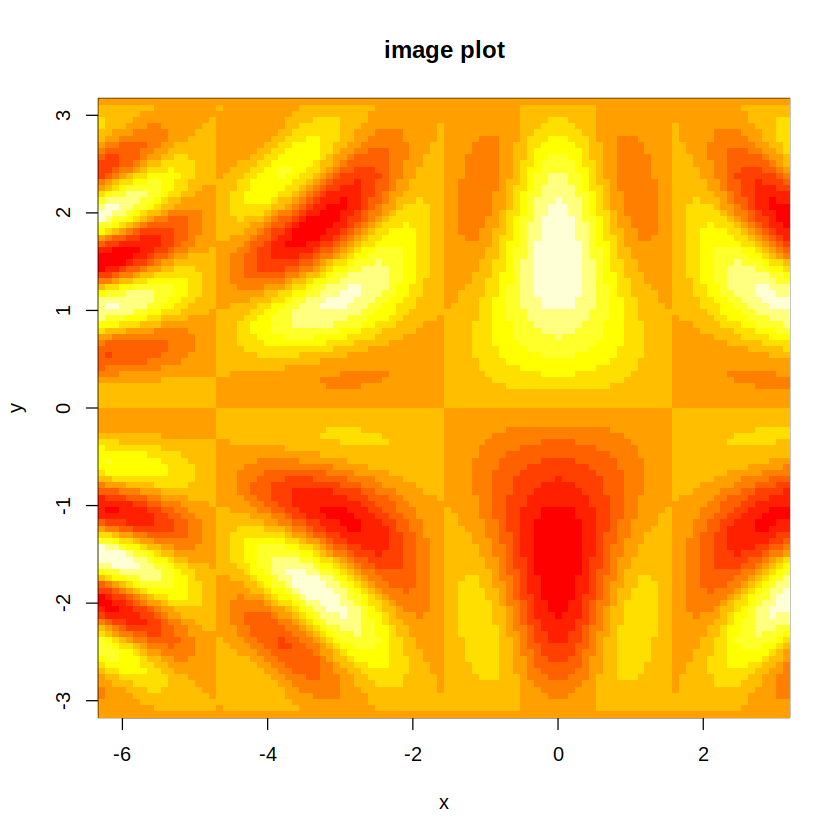

In [17]:
image(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y))); title("image plot");

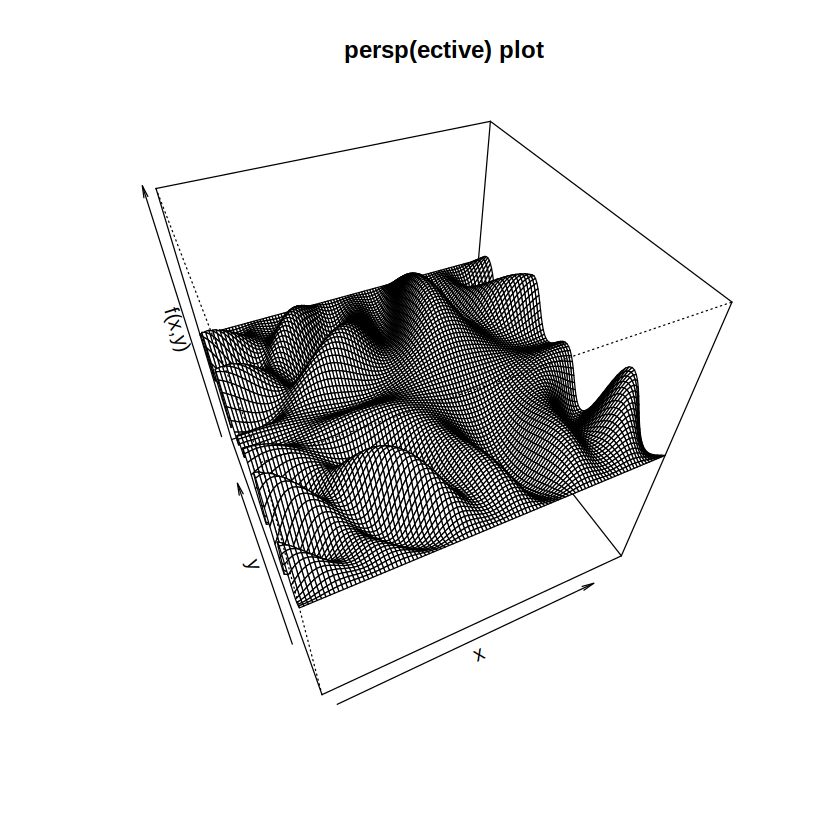

In [18]:
persp(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y)), theta=-25, phi=45, zlim=c(-3, 3), 
                  zlab="f(x,y)", main="persp(ective) plot");

In [19]:
matrix(1:15, 3, 5)[-2,]

[,1] [,2] [,3] [,4] [,5]
[1,] 1    4    7    10   13  
[2,] 3    6    9    12   15

In [20]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [21]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

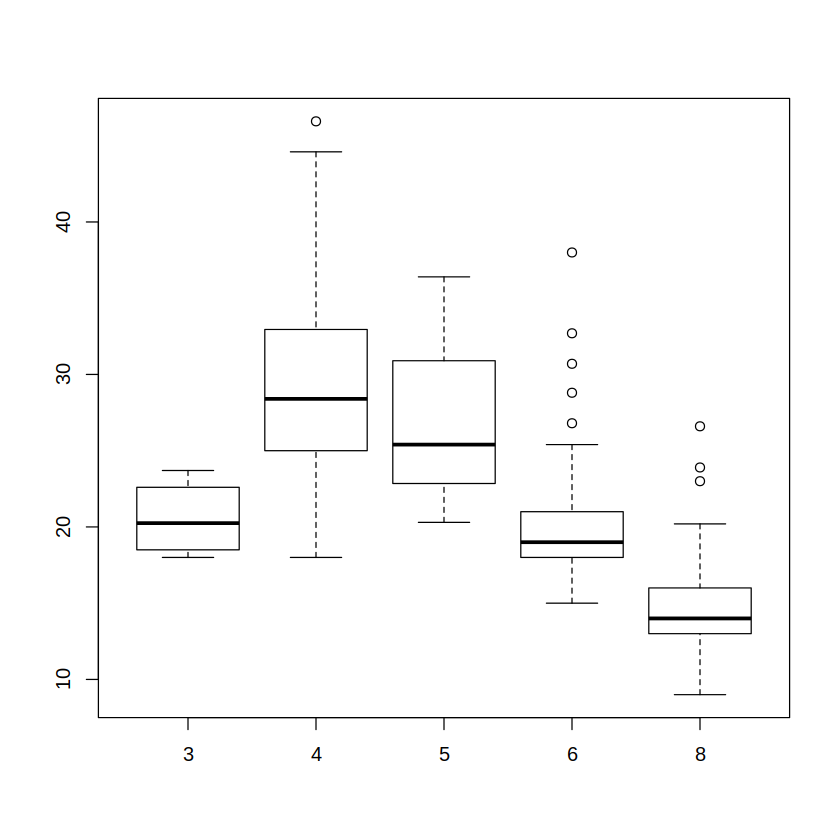

In [22]:
plot(as.factor(Auto$cylinders), Auto$mpg)

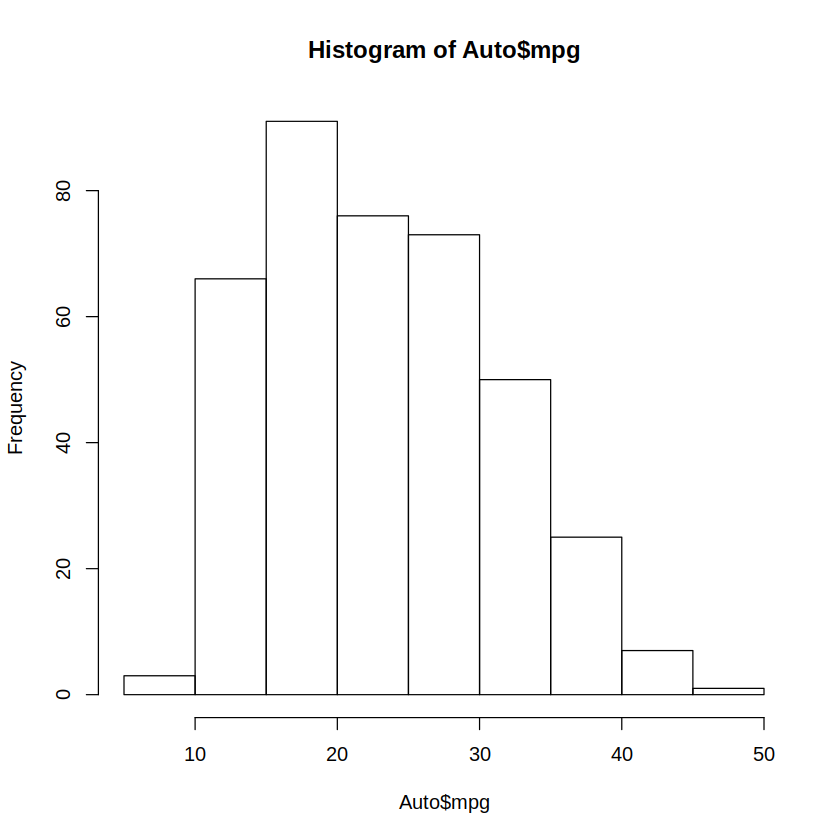

In [23]:
hist(Auto$mpg)

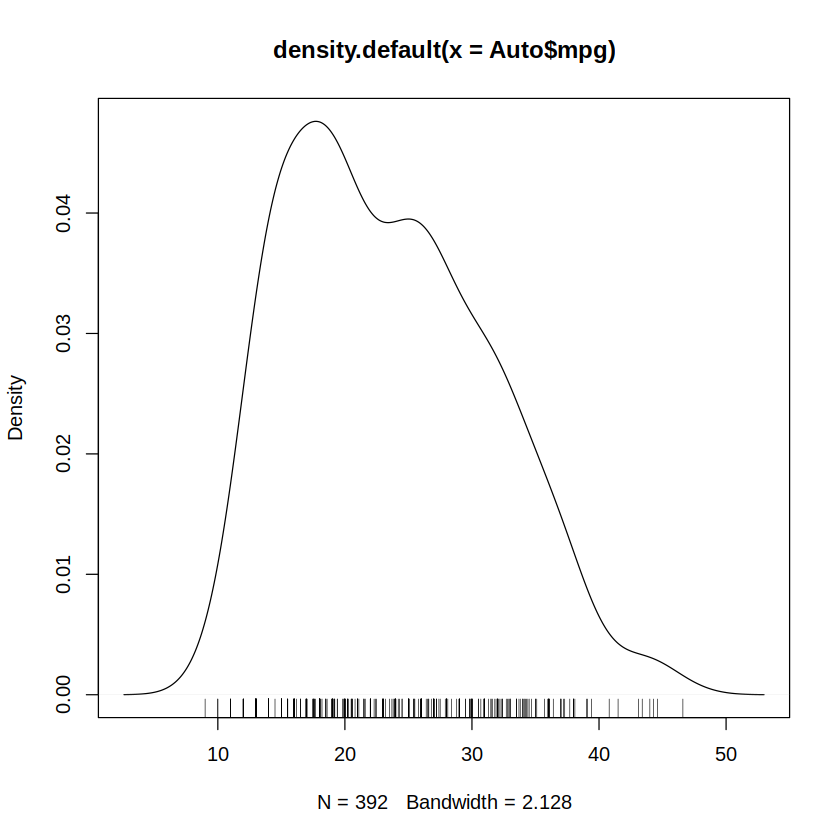

In [24]:
plot(density(Auto$mpg)); rug(Auto$mpg)

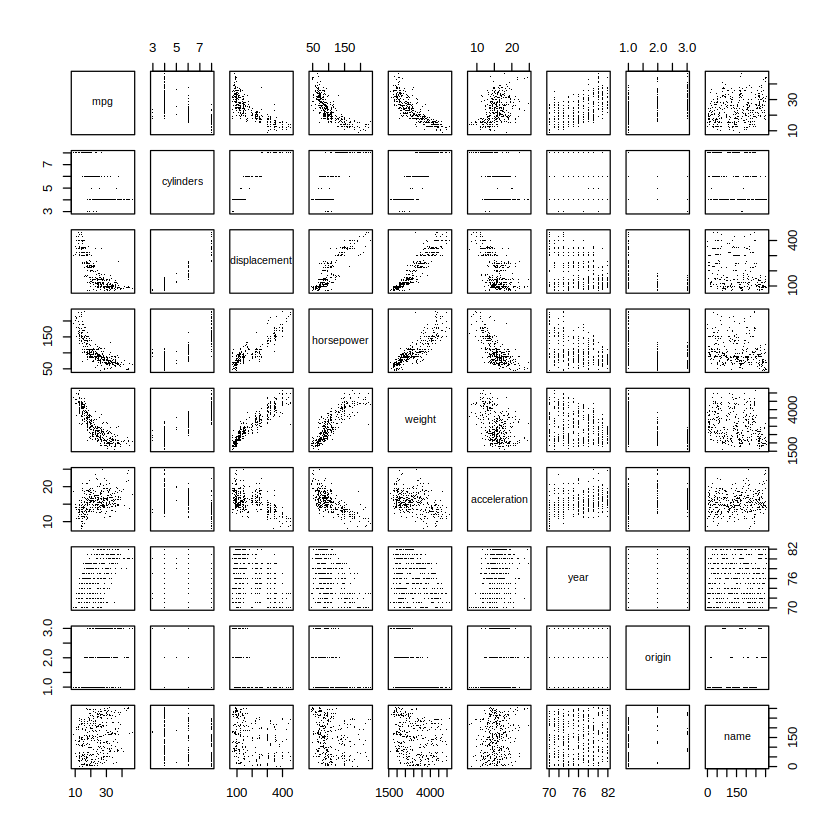

In [25]:
pairs(Auto, pch=".")

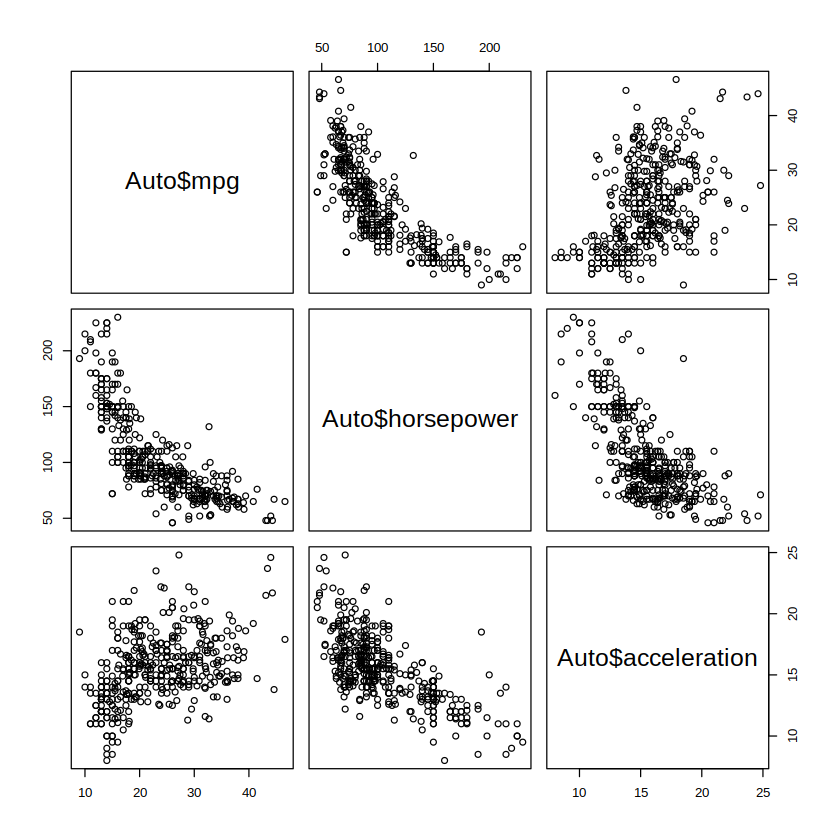

In [26]:
pairs(~ Auto$mpg + Auto$horsepower + Auto$acceleration)


Call:
lm(formula = mpg ~ year, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0212  -5.4411  -0.4412   4.9739  18.2088 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -70.01167    6.64516  -10.54   <2e-16 ***
year          1.23004    0.08736   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.363 on 390 degrees of freedom
Multiple R-squared:  0.337,	Adjusted R-squared:  0.3353 
F-statistic: 198.3 on 1 and 390 DF,  p-value: < 2.2e-16


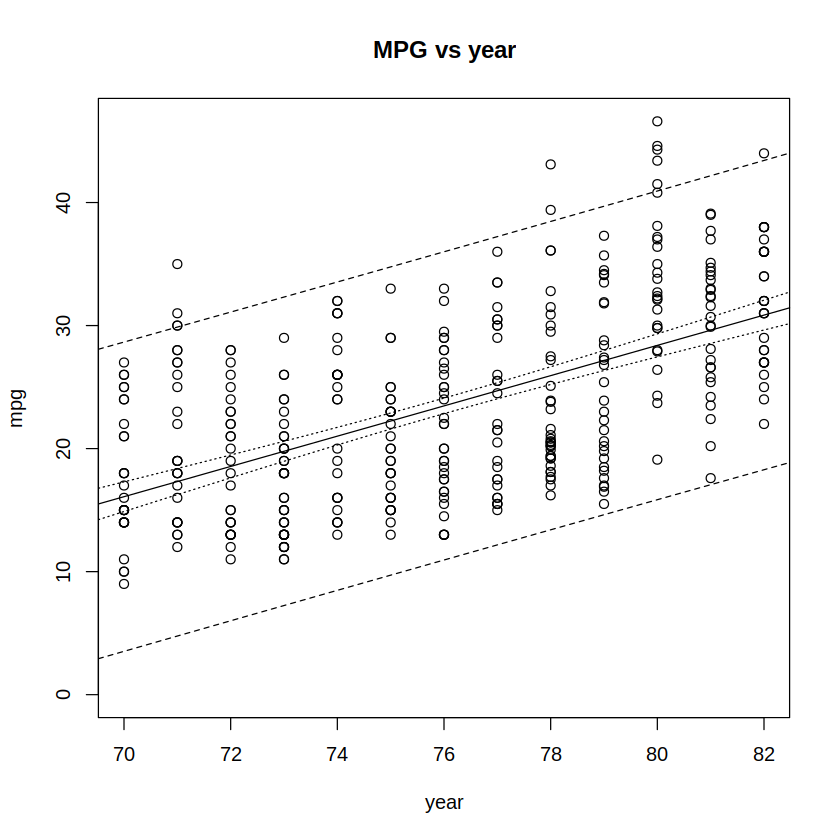

In [27]:
m <- lm(mpg ~ year, Auto);
summary(m);
plot(mpg ~ year, Auto, main = "MPG vs year", ylim=c(0,max(Auto$mpg)));

xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(year=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(year=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

### Exercises

#### 8

In [28]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

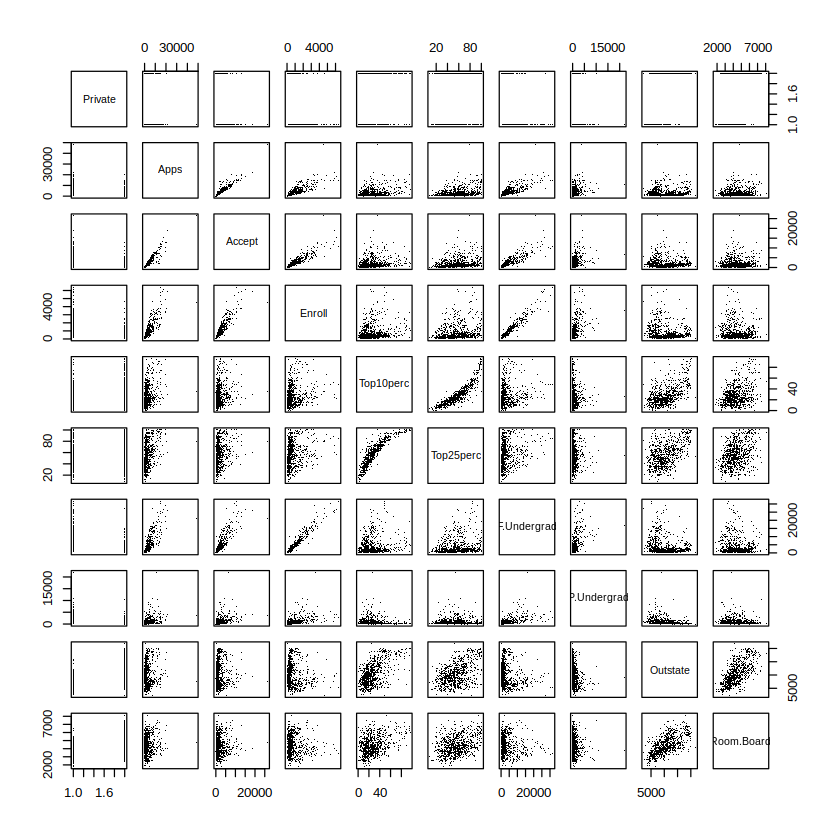

In [29]:
pairs(College[,1:10], pch=".")

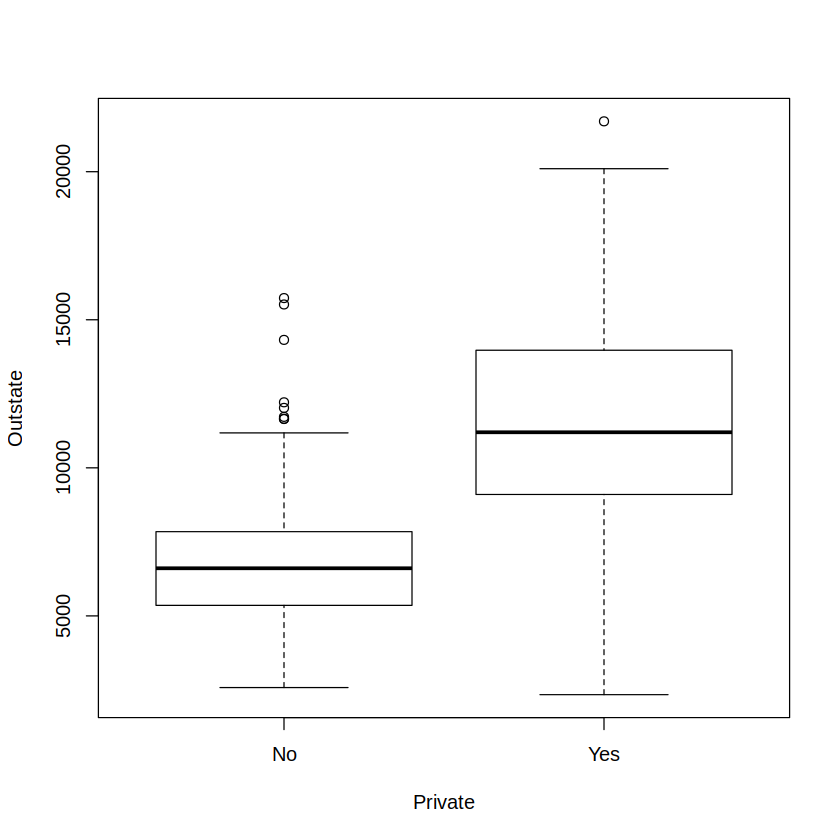

In [30]:
plot(Outstate ~ Private, College)

   Mode   FALSE    TRUE 
logical     699      78 

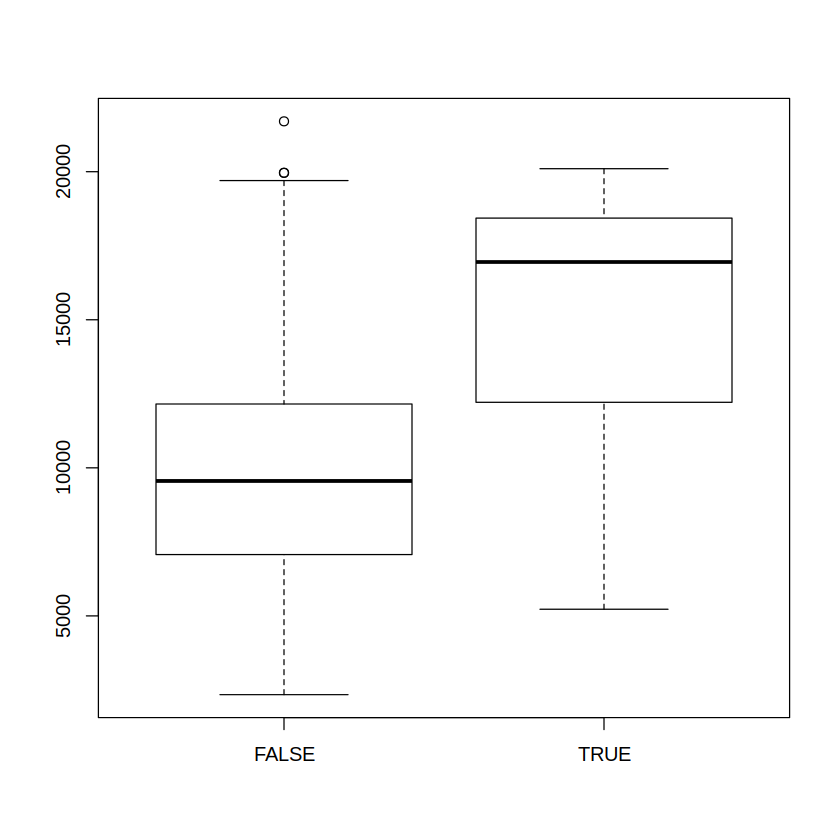

In [31]:
Elite = College$Top10perc > 50;
college = data.frame(College, Elite);
summary(college$Elite);
boxplot(Outstate ~ Elite, college)

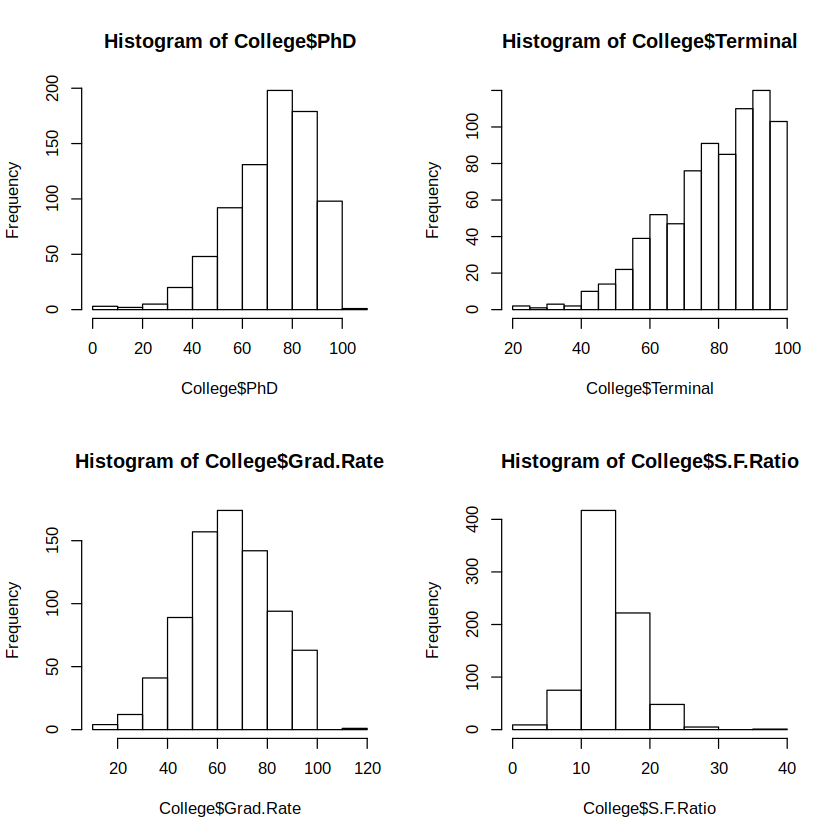

In [32]:
par(mfrow=c(2,2));
hist(College$PhD);
hist(College$Terminal);
hist(College$Grad.Rate);
hist(College$S.F.Ratio);

### 9

In [33]:
ncols = dim(Auto)[2]
sapply(1:(ncols), 
       function (i) {
           if (is.numeric(Auto[1,i])) {
               c(colnames(Auto)[i], range(Auto[,i])) 
           } else {
               c(colnames(Auto)[i], "not numeric", "") 
           }
       }
      )

[,1] [,2]      [,3]         [,4]       [,5]   [,6]         [,7] [,8]  
[1,] mpg  cylinders displacement horsepower weight acceleration year origin
[2,] 9    3         68           46         1613   8            70   1     
[3,] 46.6 8         455          230        5140   24.8         82   3     
     [,9]       
[1,] name       
[2,] not numeric
[3,]

### 10

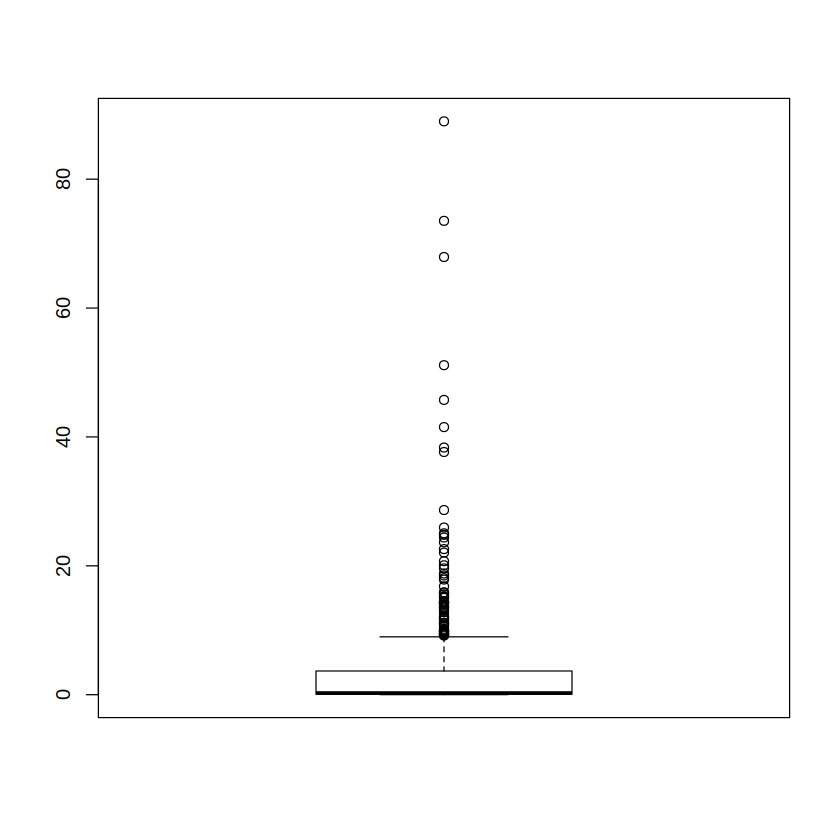

In [34]:
boxplot(Boston$crim)

In [35]:
sum(Boston$chas)

[1] 35

## Chapter 3

### Lab

In [36]:
m = lm(medv ~ lstat, Boston);
summary(m)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [37]:
names(m)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [38]:
coef(m)

(Intercept)       lstat 
 34.5538409  -0.9500494

In [39]:
confint(m)

2.5 %     97.5 %    
(Intercept) 33.448457 35.6592247
lstat       -1.026148 -0.8739505

In [40]:
predict(m, data.frame(lstat=c(1,6,12)), interval="confidence")

fit      lwr      upr     
1 33.60379 32.56402 34.64356
2 28.85354 28.11121 29.59588
3 23.15325 22.60809 23.69841

In [41]:
predict(m, data.frame(lstat=c(1,6,12)), interval="prediction")

fit      lwr      upr     
1 33.60379 21.34761 45.85997
2 28.85354 16.61901 41.08808
3 23.15325 10.92909 35.37740

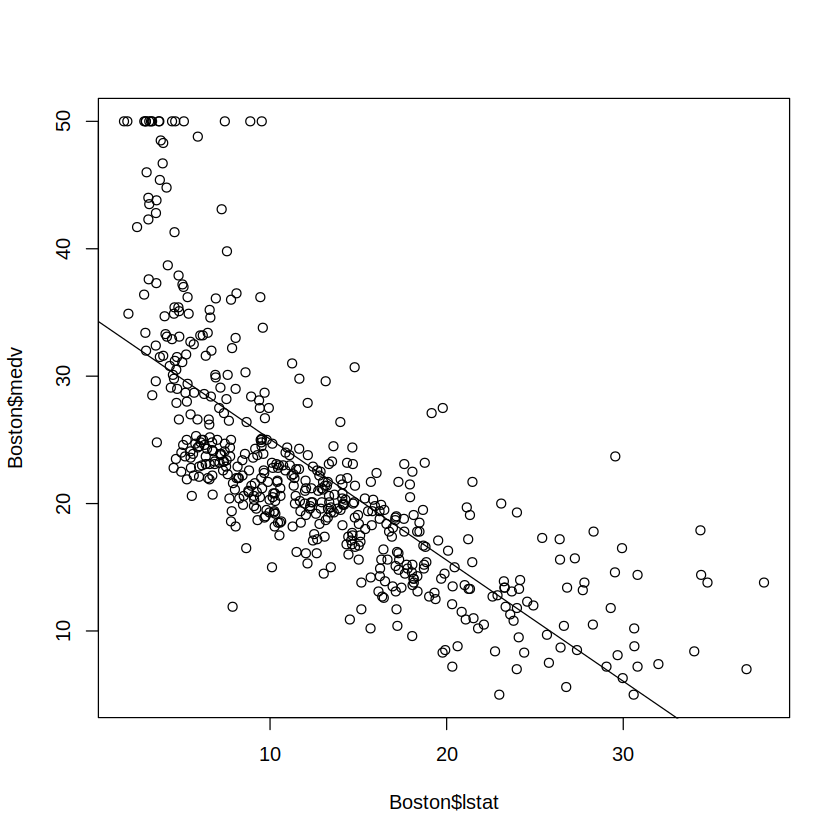

In [42]:
plot(Boston$lstat, Boston$medv);
abline(m)

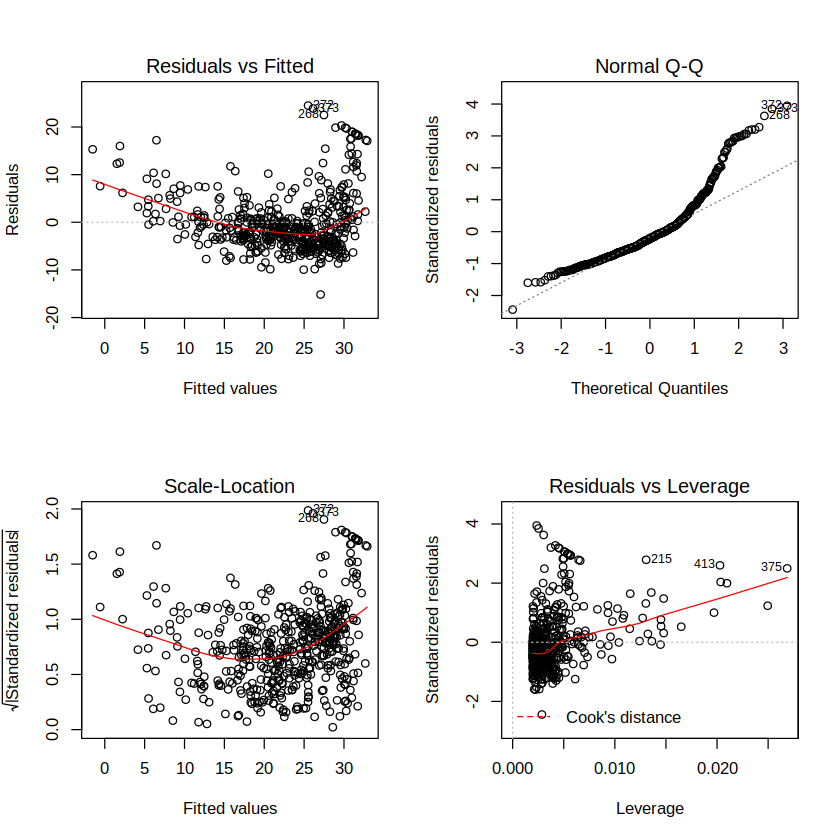

In [43]:
par(mfrow=c(2,2));
plot(m)

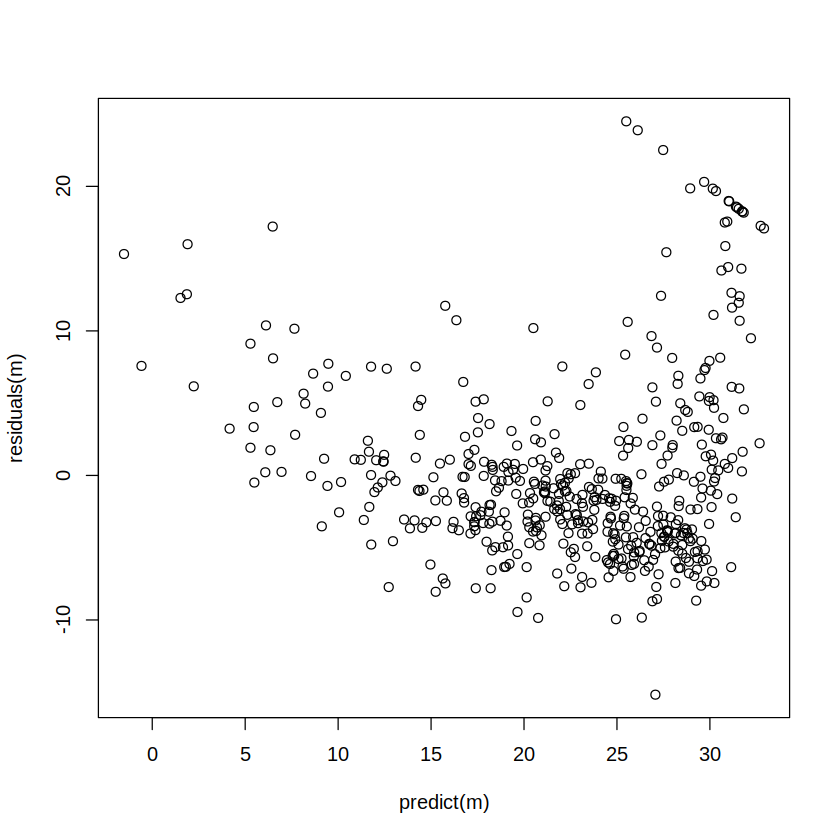

In [44]:
plot(predict(m), residuals(m))

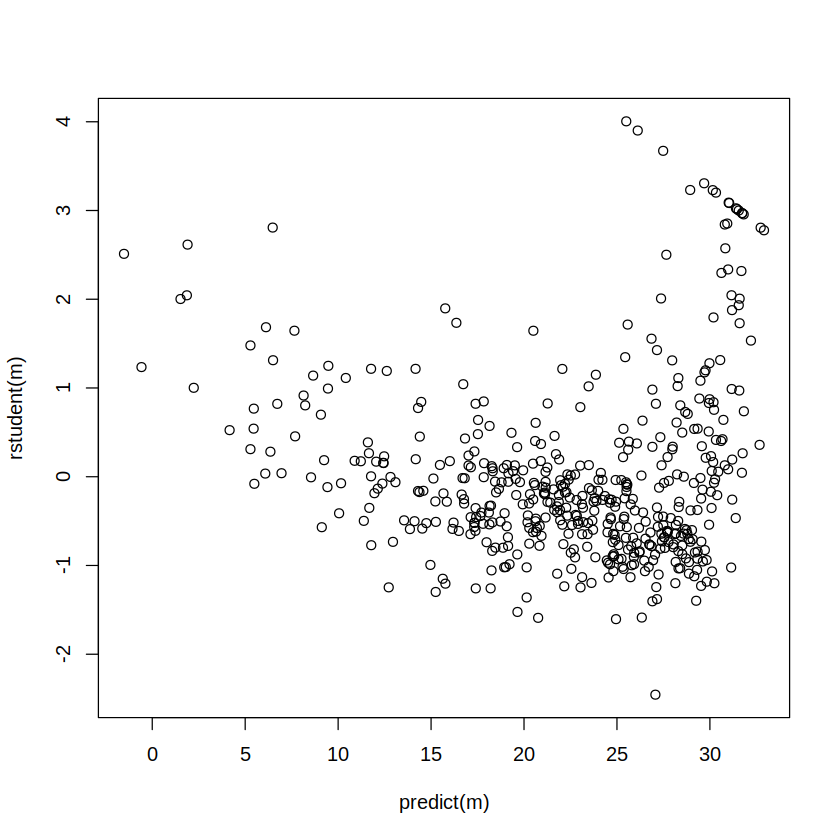

In [45]:
plot(predict(m), rstudent(m))

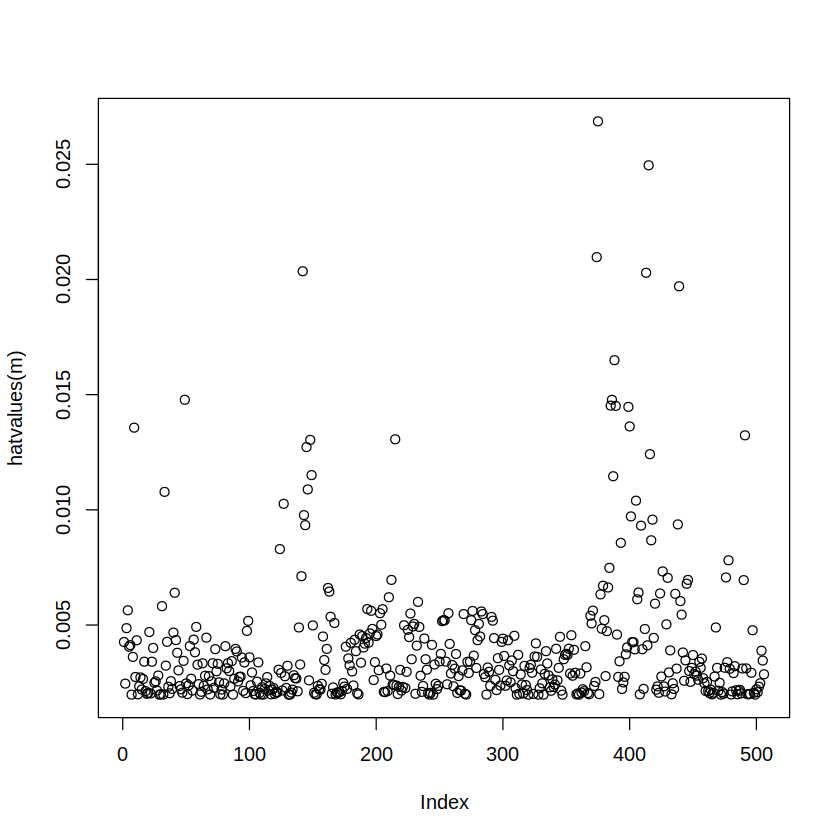

In [46]:
plot(hatvalues(m))

In [47]:
which.max(hatvalues(m))

375 
375

In [48]:
m <- lm(medv ~ lstat + age, Boston);
summary(m)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [49]:
m <- lm(medv ~ ., Boston);
summary(m)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [50]:
m <- lm(medv ~ .-age, Boston);
summary(m)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

In [51]:
m1 = update(m, ~.-indus);
summary(m1)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

In [52]:
summary(lm(medv~lstat*age, Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [53]:
summary(lm(medv ~ lstat + I(lstat^2), Boston))


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [54]:
m1 = lm(medv ~ lstat, Boston);
m2 = lm(medv ~ lstat + I(lstat^2), Boston);
anova(m1, m2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 504    19472.38 NA       NA        NA           NA
2 503    15347.24  1 4125.138  135.1998 7.630116e-28

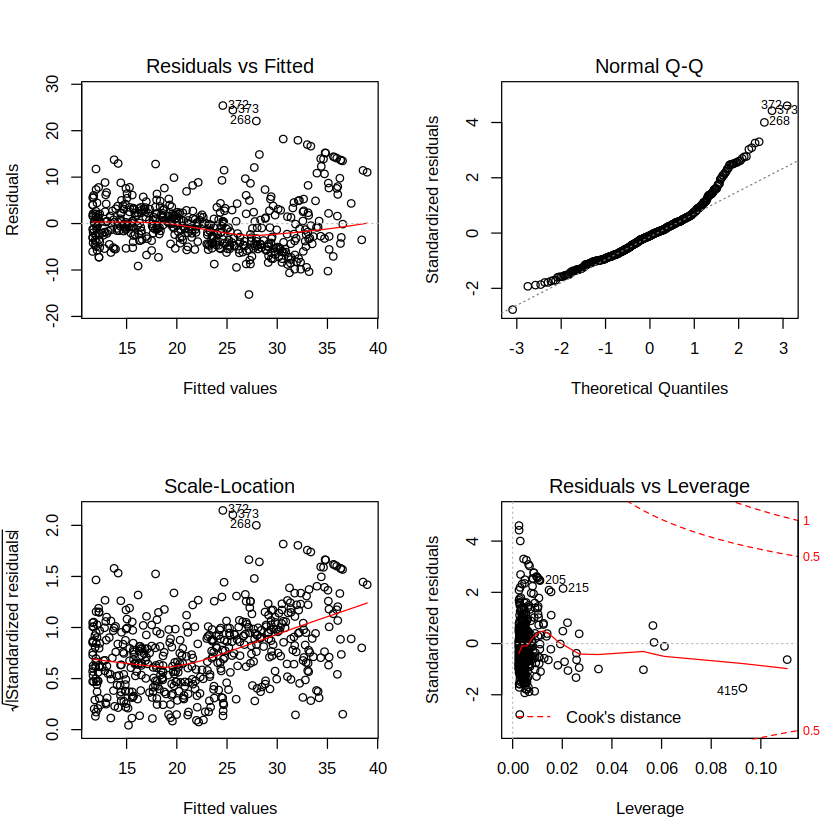

In [55]:
par(mfrow=c(2,2));
plot(m2)

In [56]:
m5 = lm(medv ~ poly(lstat,5), Boston);
summary(m5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


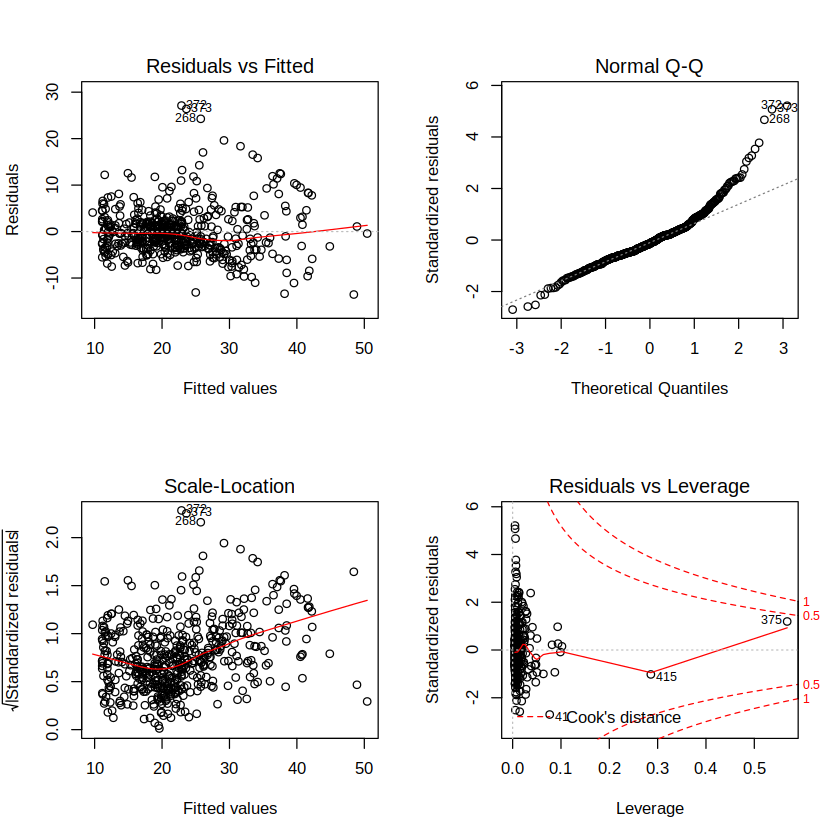

In [57]:
par(mfrow=c(2,2));
plot(m5)

In [58]:
summary(lm(medv ~ log(lstat), Boston))


Call:
lm(formula = medv ~ log(lstat), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4599  -3.5006  -0.6686   2.1688  26.0129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  52.1248     0.9652   54.00   <2e-16 ***
log(lstat)  -12.4810     0.3946  -31.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.329 on 504 degrees of freedom
Multiple R-squared:  0.6649,	Adjusted R-squared:  0.6643 
F-statistic:  1000 on 1 and 504 DF,  p-value: < 2.2e-16


In [59]:
m = lm(Sales ~ . + Income:Advertising + Price:Age, Carseats);
summary(m)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [60]:
contrasts(Carseats$ShelveLoc)

Good Medium
Bad    0    0     
Good   1    0     
Medium 0    1

## Chapter 4

### lab

In [61]:
cor(Smarket[,-9])

Year       Lag1         Lag2         Lag3         Lag4        
Year   1.00000000  0.029699649  0.030596422  0.033194581  0.035688718
Lag1   0.02969965  1.000000000 -0.026294328 -0.010803402 -0.002985911
Lag2   0.03059642 -0.026294328  1.000000000 -0.025896670 -0.010853533
Lag3   0.03319458 -0.010803402 -0.025896670  1.000000000 -0.024051036
Lag4   0.03568872 -0.002985911 -0.010853533 -0.024051036  1.000000000
Lag5   0.02978799 -0.005674606 -0.003557949 -0.018808338 -0.027083641
Volume 0.53900647  0.040909908 -0.043383215 -0.041823686 -0.048414246
Today  0.03009523 -0.026155045 -0.010250033 -0.002447647 -0.006899527
       Lag5         Volume      Today       
Year    0.029787995  0.53900647  0.030095229
Lag1   -0.005674606  0.04090991 -0.026155045
Lag2   -0.003557949 -0.04338321 -0.010250033
Lag3   -0.018808338 -0.04182369 -0.002447647
Lag4   -0.027083641 -0.04841425 -0.006899527
Lag5    1.000000000 -0.02200231 -0.034860083
Volume -0.022002315  1.00000000  0.014591823
Today  -0.034860083  0.01459182  1.000000000

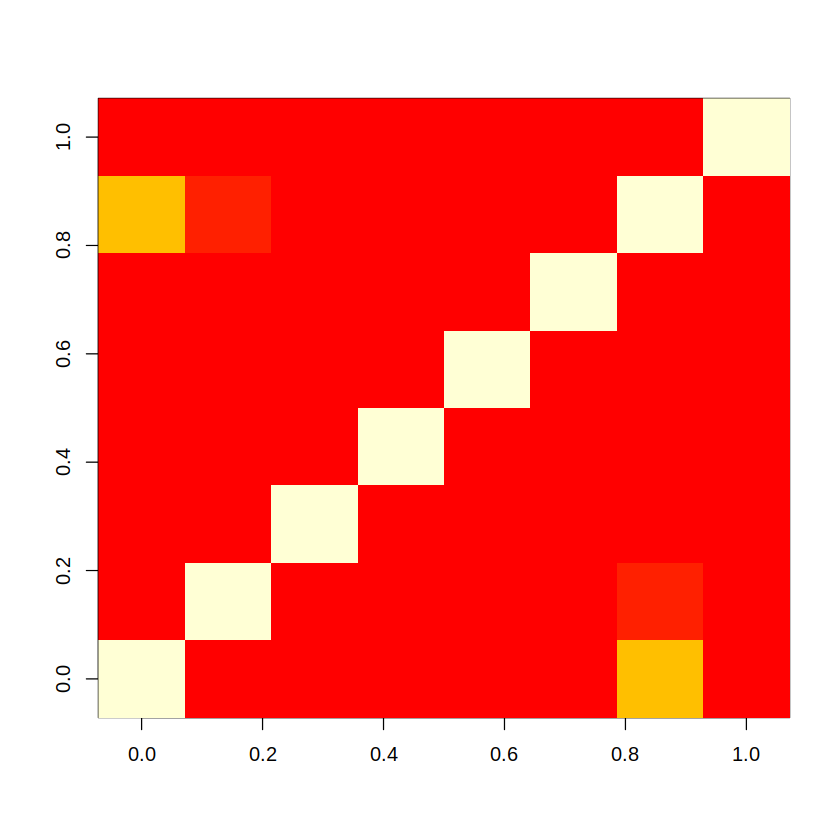

In [62]:
image(cor(Smarket[,-9]))

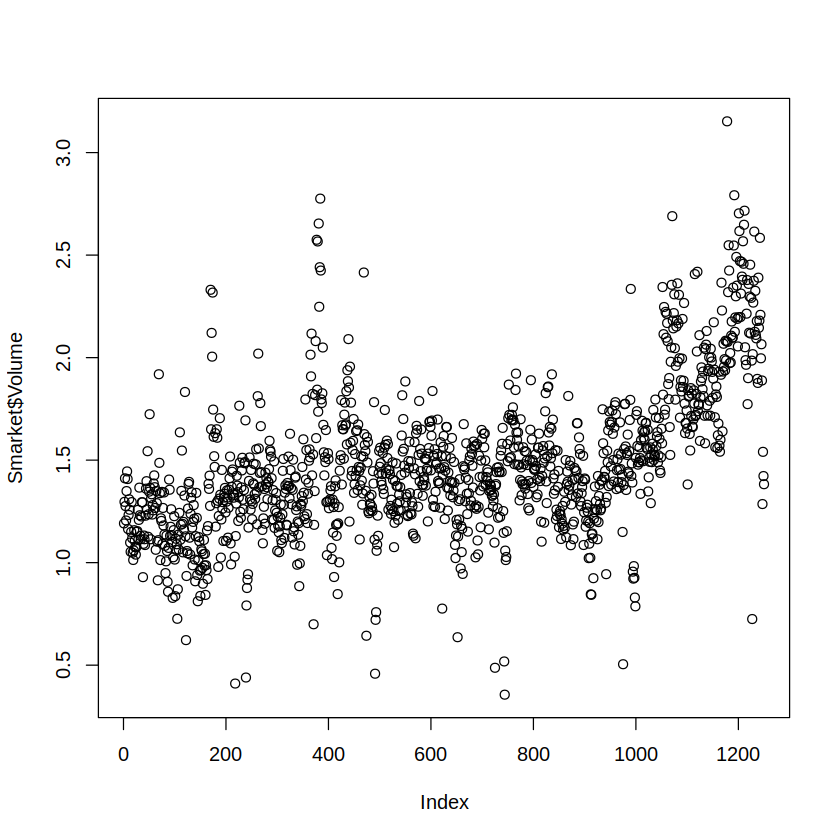

In [63]:
plot(Smarket$Volume)

In [64]:
m = glm(Direction ~ .-Direction-Today-Year, Smarket, family=binomial);
summary(m)


Call:
glm(formula = Direction ~ . - Direction - Today - Year, family = binomial, 
    data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [65]:
coef(m)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [66]:
summary(m)$coefficients

Estimate     Std. Error z value    Pr(>|z|) 
(Intercept) -0.126000257 0.24073574 -0.5233966 0.6006983
Lag1        -0.073073746 0.05016739 -1.4565986 0.1452272
Lag2        -0.042301344 0.05008605 -0.8445733 0.3983491
Lag3         0.011085108 0.04993854  0.2219750 0.8243333
Lag4         0.009358938 0.04997413  0.1872757 0.8514445
Lag5         0.010313068 0.04951146  0.2082966 0.8349974
Volume       0.135440659 0.15835970  0.8552723 0.3924004

In [67]:
contrasts(Smarket$Direction)

Up
Down 0 
Up   1

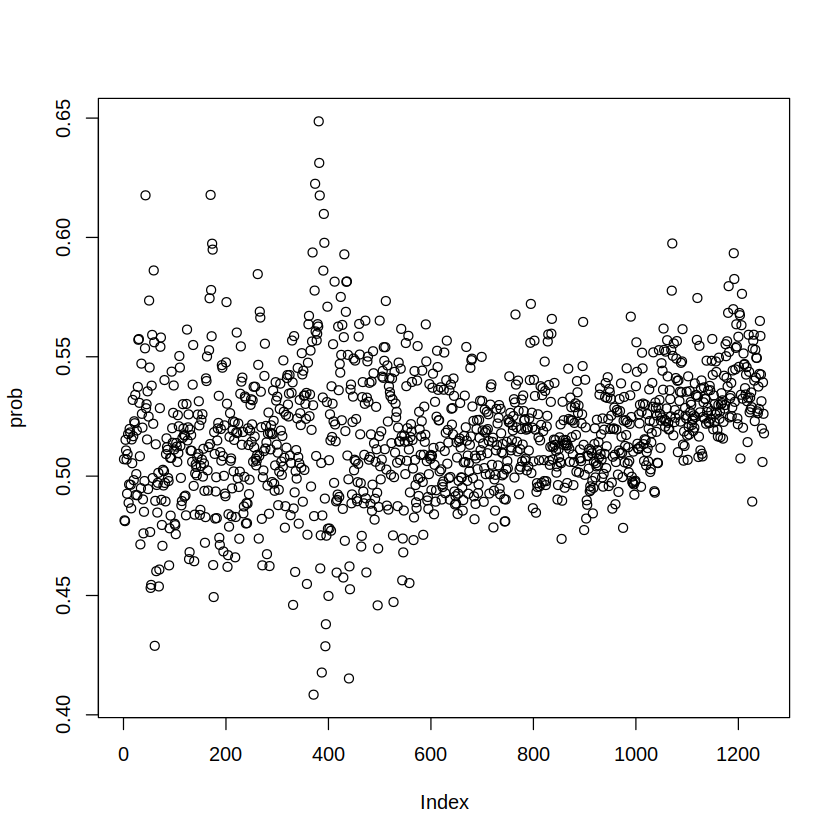

In [68]:
prob = predict(m, type="response");
plot(prob)

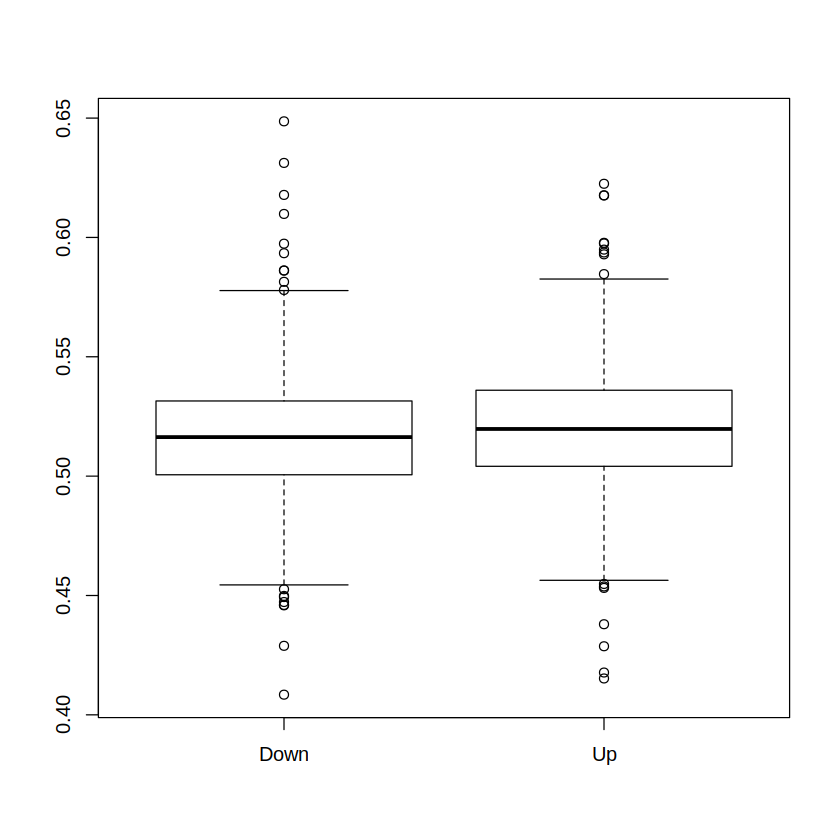

In [69]:
boxplot(prob ~ Smarket$Direction)

In [70]:
pred = rep("Down",length(prob));
pred[prob > 0.5] = "Up";
table(pred, Smarket$Direction)

      
pred   Down  Up
  Down  145 141
  Up    457 507

In [71]:
train = (Smarket$Year < 2005);
m = glm(Direction ~ .-Direction-Today-Year, Smarket[train,], family=binomial);
summary(m)


Call:
glm(formula = Direction ~ . - Direction - Today - Year, family = binomial, 
    data = Smarket[train, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


In [72]:
prob = predict(m, Smarket[!train,], type="response");
pred = rep("Down",length(prob));
pred[prob > 0.5] = "Up";
table(pred, Smarket[!train,]$Direction)

      
pred   Down Up
  Down   77 97
  Up     34 44

In [73]:
m = lda(Direction ~ .-Direction-Today-Year, Smarket[train,]);
m

Call:
lda(Direction ~ . - Direction - Today - Year, data = Smarket[train, 
    ])

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2         Lag3         Lag4          Lag5   Volume
Down  0.04279022  0.03389409 -0.009806517 -0.010598778  0.0043665988 1.371843
Up   -0.03954635 -0.03132544  0.005834320  0.003110454 -0.0006508876 1.363210

Coefficients of linear discriminants:
               LD1
Lag1   -0.58081056
Lag2   -0.49111007
Lag3    0.07707664
Lag4    0.06904095
Lag5   -0.04549853
Volume -1.24678716

In [74]:
pred = predict(m, Smarket[!train,]);
table(pred$class, Smarket[!train,]$Direction)

      
       Down Up
  Down   77 97
  Up     34 44

In [75]:
m = qda(Direction ~ .-Direction-Today-Year, Smarket[train,]);
m

Call:
qda(Direction ~ . - Direction - Today - Year, data = Smarket[train, 
    ])

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2         Lag3         Lag4          Lag5   Volume
Down  0.04279022  0.03389409 -0.009806517 -0.010598778  0.0043665988 1.371843
Up   -0.03954635 -0.03132544  0.005834320  0.003110454 -0.0006508876 1.363210

In [76]:
pred = predict(m, Smarket[!train,]);
table(pred$class, Smarket[!train,]$Direction)

      
       Down  Up
  Down   82 111
  Up     29  30

In [77]:
mean(pred$class == Smarket[!train,]$Direction)

[1] 0.4444444

In [78]:
m = qda(Direction ~ Lag1 + Lag2, Smarket[train,]);
pred = predict(m, Smarket[!train,]);
table(pred$class, Smarket[!train,]$Direction)

      
       Down  Up
  Down   30  20
  Up     81 121

In [79]:
mean(pred$class == Smarket[!train,]$Direction)

[1] 0.5992063

In [80]:
library(class)

In [81]:
pred = knn(cbind(Smarket$Lag1,Smarket$Lag2)[train,], cbind(Smarket$Lag1,Smarket$Lag2)[!train,], Smarket[train,]$Direction, k=1);
table(pred, Smarket$Direction[!train])

      
pred   Down Up
  Down   43 58
  Up     68 83

In [82]:
mean(pred == Smarket$Direction[!train])

[1] 0.5

In [83]:
pred = knn(cbind(Smarket$Lag1,Smarket$Lag2)[train,], cbind(Smarket$Lag1,Smarket$Lag2)[!train,], Smarket[train,]$Direction, k=3);
table(pred, Smarket$Direction[!train])

      
pred   Down Up
  Down   48 55
  Up     63 86

In [84]:
mean(pred == Smarket$Direction[!train])

[1] 0.531746

#### Section 4.6.6

In [85]:
dim(Caravan)

[1] 5822   86

In [86]:
summary(Caravan$Purchase)

No  Yes 
5474  348

In [87]:
Caravan.scaled = scale(Caravan[,-86])

In [88]:
c(mean(Caravan[,1]), var(Caravan[,1]), mean(Caravan.scaled[,1]), var(Caravan.scaled[,1]))

[1]  2.425335e+01  1.650378e+02 -7.025576e-17  1.000000e+00

In [89]:
test = 1:1000;
set.seed(1);
pred = knn(Caravan.scaled[-test,], Caravan.scaled[test,], Caravan$Purchase[-test], k=1)

In [90]:
table(pred, Caravan$Purchase[test])

     
pred   No Yes
  No  873  50
  Yes  68   9

In [91]:
test = 1:1000;
set.seed(1);
pred = knn(Caravan.scaled[-test,], Caravan.scaled[test,], Caravan$Purchase[-test], k=3);
table(pred, Caravan$Purchase[test])

     
pred   No Yes
  No  921  54
  Yes  20   5

In [92]:
m = suppressWarnings(glm(Purchase ~ ., Caravan, family=binomial, subset=-test))

In [93]:
pred = rep("No", length(test));
pred[predict(m, Caravan[test,], type="response") > 0.25] = "Yes";
table(pred, Caravan$Purchase[test])

     
pred   No Yes
  No  919  48
  Yes  22  11

## Chapter 5
### Chapter 5 Lab

In [94]:
set.seed(1);
train=sample(392,196)

In [95]:
m = lm(mpg ~ horsepower, data=Auto, subset=train)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 26.14142

In [96]:
m = lm(mpg ~ poly(horsepower,2), data=Auto, subset=train)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 19.82259

In [97]:
m = lm(mpg ~ poly(horsepower,3), data=Auto, subset=train)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 19.78252

In [98]:
set.seed(2);
train=sample(392,196);
m = lm(mpg ~ horsepower, data=Auto, subset=train)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 23.29559

In [99]:
m = lm(mpg ~ poly(horsepower,2), data=Auto, subset=train)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 18.90124

In [100]:
m = lm(mpg ~ poly(horsepower,3), data=Auto, subset=train)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 19.2574

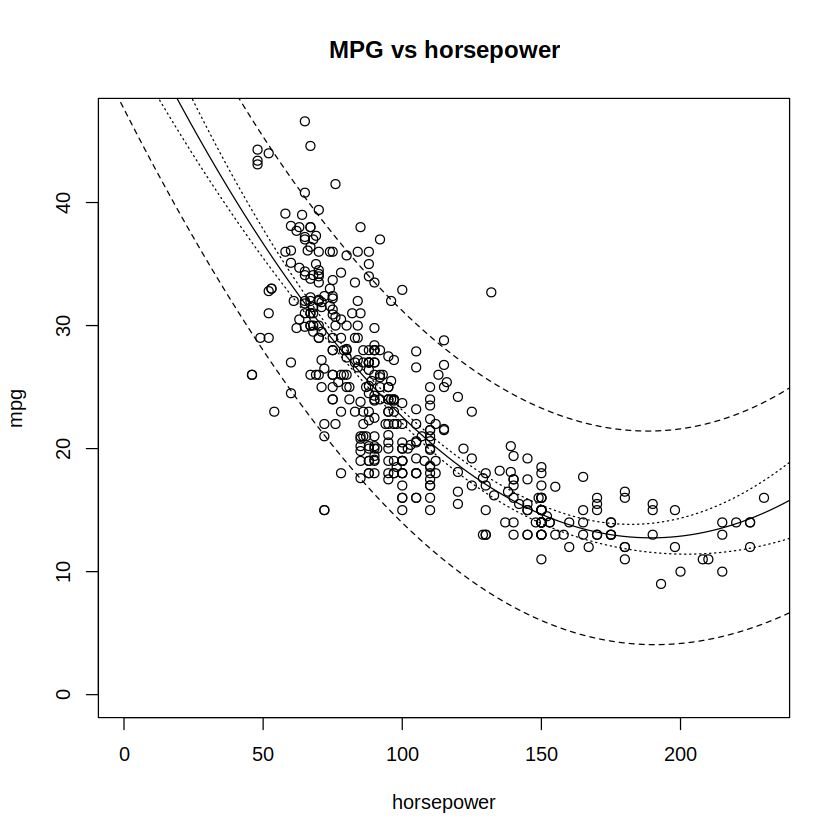

In [101]:
m <- lm(mpg ~ poly(horsepower,2), Auto);
plot(mpg ~ horsepower, Auto, main = "MPG vs horsepower", xlim=c(0,max(Auto$horsepower)), ylim=c(0,max(Auto$mpg)));

xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(horsepower=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(horsepower=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

In [102]:
suppressMessages(library(boot))

In [103]:
m = glm(mpg ~ horsepower, data=Auto)
mean((Auto$mpg - predict(m, Auto))[-train]^2)

[1] 22.64191

In [104]:
cv.glm(Auto, m)$delta

[1] 24.23151 24.23114

In [105]:
err = rep(0,5);
for (i in 1:5) {
    m = glm(mpg ~ poly(horsepower,i), data=Auto);
    err[i] = cv.glm(Auto, m)$delta[1];
}
err

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

In [106]:
set.seed(17)
err = rep(0,10);
for (i in 1:10) {
    m = glm(mpg ~ poly(horsepower,i), data=Auto);
    err[i] = cv.glm(Auto, m, K=10)$delta[1];
}
err

[1] 24.20520 19.18924 19.30662 19.33799 18.87911 19.02103 18.89609 19.71201
 [9] 18.95140 19.50196

In [107]:
alpha = function(data, index) {
    x = data$X[index];
    y = data$Y[index];
    return((var(y) - cov(x,y))/(var(x) + var(y) - 2*cov(x,y)))
}

In [108]:
alpha(Portfolio, 1:100)

[1] 0.5758321

In [109]:
set.seed(1);
alpha(Portfolio, sample(100, 100, replace=T))

[1] 0.5963833

In [110]:
boot(Portfolio, alpha, R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

In [111]:
f = function(data, index) {
    return(coef(lm(mpg ~ horsepower, data=data, subset=index)))
};
f(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [112]:
set.seed(1);
f(Auto, sample(392, 392, replace=T))

(Intercept)  horsepower 
 38.7387134  -0.1481952

In [113]:
f(Auto, sample(392, 392, replace=T))

(Intercept)  horsepower 
 40.0383086  -0.1596104

In [114]:
boot(Auto, f, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = f, R = 1000)


Bootstrap Statistics :
      original      bias    std. error
t1* 39.9358610  0.02972191 0.860007896
t2* -0.1578447 -0.00030823 0.007404467

In [115]:
summary(lm(mpg ~ horsepower, data=Auto))


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [116]:
f2 = function(data, index) {
    return(coef(lm(mpg ~ poly(horsepower, 2), data=data, subset=index)))
};
boot(Auto, f2, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = f2, R = 1000)


Bootstrap Statistics :
      original       bias    std. error
t1*   23.44592 -0.007122555    0.228654
t2* -120.13774  0.119677557    3.687520
t3*   44.08953 -0.121170665    4.369541

In [117]:
summary(lm(mpg ~ poly(horsepower, 2), data=Auto))


Call:
lm(formula = mpg ~ poly(horsepower, 2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.4459     0.2209  106.13   <2e-16 ***
poly(horsepower, 2)1 -120.1377     4.3739  -27.47   <2e-16 ***
poly(horsepower, 2)2   44.0895     4.3739   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


In [118]:
summary(lm(mpg ~ horsepower + I(horsepower^2), data=Auto))


Call:
lm(formula = mpg ~ horsepower + I(horsepower^2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     56.9000997  1.8004268   31.60   <2e-16 ***
horsepower      -0.4661896  0.0311246  -14.98   <2e-16 ***
I(horsepower^2)  0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


In [119]:
summary(lm(mpg ~ poly(horsepower, 2, raw=T), data=Auto))


Call:
lm(formula = mpg ~ poly(horsepower, 2, raw = T), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   56.9000997  1.8004268   31.60   <2e-16 ***
poly(horsepower, 2, raw = T)1 -0.4661896  0.0311246  -14.98   <2e-16 ***
poly(horsepower, 2, raw = T)2  0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


## Chapter 6
### Chapter 6 lab

In [120]:
head(Hitters)

AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun
-Andy Allanson    293    66   1    30   29  14     1     293     66    1   
-Alan Ashby       315    81   7    24   38  39    14    3449    835   69   
-Alvin Davis      479   130  18    66   72  76     3    1624    457   63   
-Andre Dawson     496   141  20    65   78  37    11    5628   1575  225   
-Andres Galarraga 321    87  10    39   42  30     2     396    101   12   
-Alfredo Griffin  594   169   4    74   51  35    11    4408   1133   19   
                  CRuns CRBI CWalks League Division PutOuts Assists Errors
-Andy Allanson     30    29   14    A      E        446      33     20    
-Alan Ashby       321   414  375    N      W        632      43     10    
-Alvin Davis      224   266  263    A      W        880      82     14    
-Andre Dawson     828   838  354    N      E        200      11      3    
-Andres Galarraga  48    46   33    N      E        805      40      4    
-Alfredo Griffin  501   336  194    A      W        282     421     25    
                  Salary NewLeague
-Andy Allanson       NA  A        
-Alan Ashby       475.0  N        
-Alvin Davis      480.0  A        
-Andre Dawson     500.0  N        
-Andres Galarraga  91.5  N        
-Alfredo Griffin  750.0  A

In [121]:
hitters = na.omit(Hitters)

In [122]:
dim(hitters)

[1] 263  20

In [123]:
dim(Hitters)

[1] 322  20

In [124]:
m = regsubsets(Salary~., Hitters, nvmax=19);
summary(m)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " "  

In [125]:
names(summary(m))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [126]:
summary(m)$rsq

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

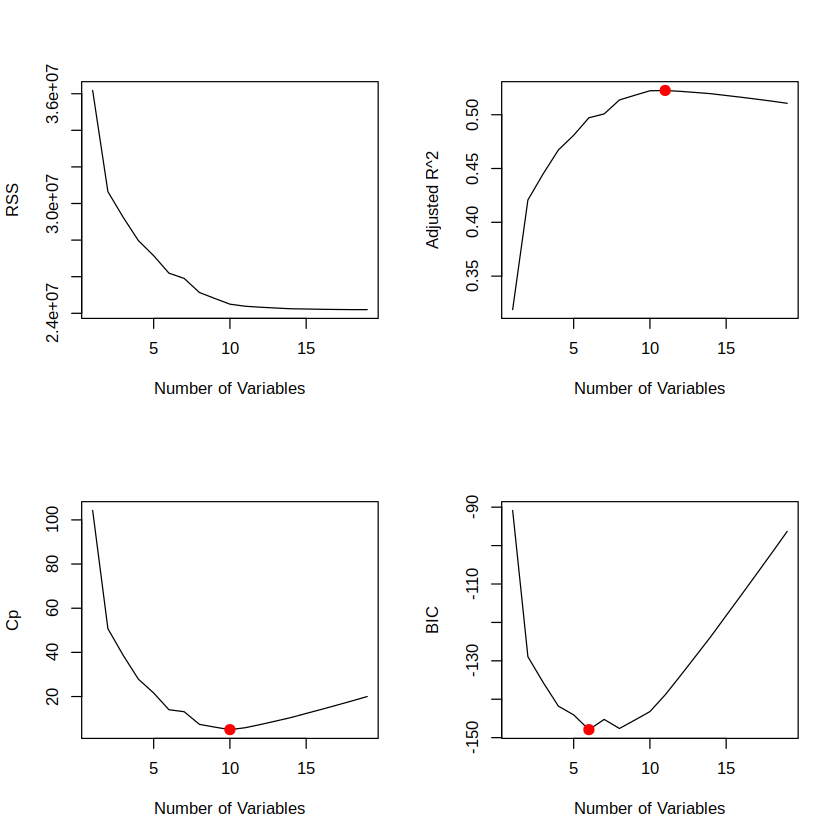

In [127]:
par(mfrow=c(2,2));
plot(summary(m)$rss, xlab="Number of Variables", ylab="RSS", type="l");
redmax = function (y, ylab) {
    plot(y, xlab="Number of Variables", ylab=ylab, type="l");
    points(which.max(y), max(y), col="red", cex=2, pch=20);
};
redmin = function (y, ylab) {
    plot(y, xlab="Number of Variables", ylab=ylab, type="l");
    points(which.min(y), min(y), col="red", cex=2, pch=20);
};
redmax(summary(m)$adjr2, "Adjusted R^2");
redmin(summary(m)$cp, "Cp");
redmin(summary(m)$bic, "BIC");

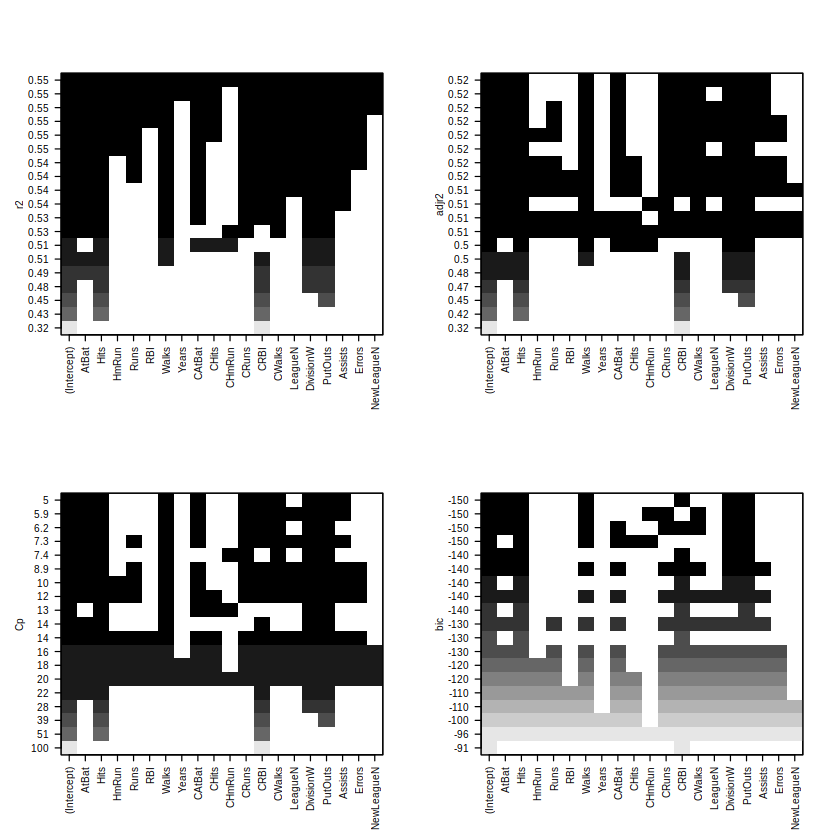

In [128]:
par(mfrow=c(2,2), cex=0.5);
plot(m, scale="r2");
plot(m, scale="adjr2");
plot(m, scale="Cp");
plot(m, scale="bic");

In [129]:
coef(m, 6)

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

In [130]:
m = regsubsets(Salary ~ ., data=Hitters, nvmax=19, method="forward");
summary(m)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [131]:
m = regsubsets(Salary ~ ., data=Hitters, nvmax=19, method="backward");
summary(m)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [132]:
set.seed(1);
train = sample(c(TRUE, FALSE), nrow(hitters), replace=TRUE);
test = !train;

In [133]:
m = regsubsets(Salary ~ ., data=hitters[train,], nvmax=19)

In [134]:
m_matrix = model.matrix(Salary ~ ., data=hitters[test,])

In [135]:
err = rep(NA,19);
for (i in 1:19) {
    beta = coef(m, id=i);
    pred = m_matrix[, names(beta)] %*% beta;
    err[i] = mean((hitters$Salary[test] - pred)^2);
}
err

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

In [136]:
coef(m, 10)

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662

In [137]:
predict.regsubsets = function (object, newdata, id, ...) {
    form = as.formula(object$call[[2]]);
    mat = model.matrix(form, newdata);
    beta = coef(object, id=id);
    return (mat[, names(beta)] %*% beta);
}

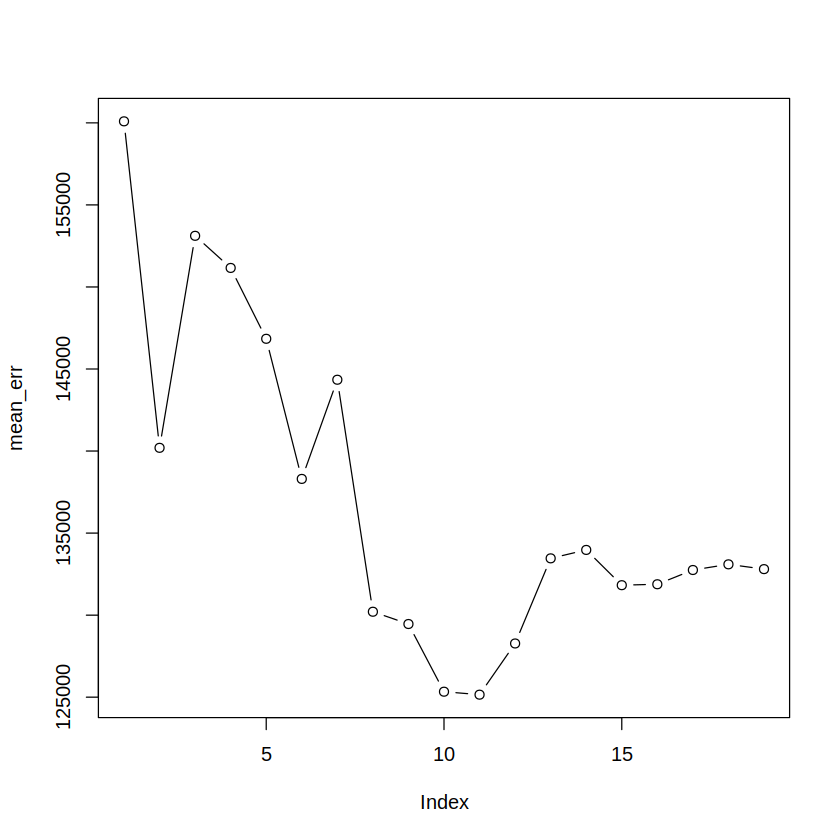

In [138]:
k = 10;
set.seed(1);
folds = sample(1:k, nrow(hitters), replace=T);
err = matrix(NA, k, 19, dimnames=list(NULL, paste(1:19)));
for (i in 1:k) {
    m = regsubsets(Salary ~ ., data=hitters[folds != i,], nvmax=19);
    for (j in 1:19) {
        pred = predict(m, hitters[folds == i,], id=j);
        err[i,j] = mean( (hitters$Salary[folds == i] - pred)^2 );
    }
}
mean_err = apply(err, 2, mean);
plot(mean_err, type='b')

In [139]:
m = regsubsets(Salary ~ ., data=hitters, nvmax=19);
coef(m, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

In [144]:
x = model.matrix(Salary ~ ., hitters)[,-1];
y = hitters$Salary;

In [146]:
grid = 10^seq(10, -2, length=100);
m = glmnet(x, y, alpha=0, lambda=grid);
dim(coef(m))

[1]  20 100

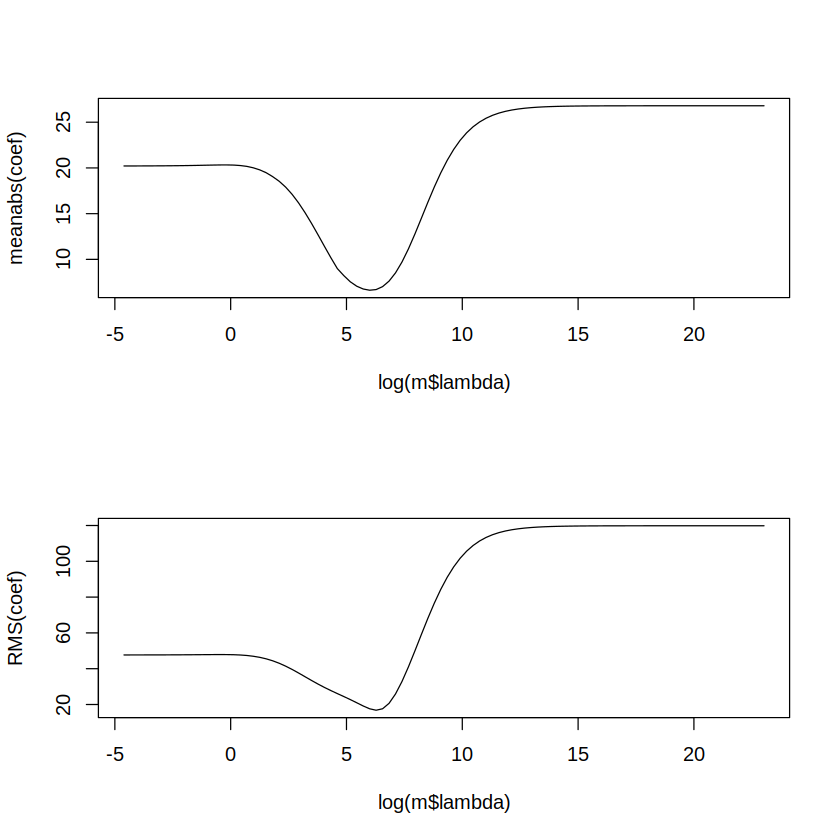

In [156]:
par(mfrow=c(2,1));
plot(log(m$lambda), apply(coef(m), 2, function (x) {mean(abs(x))}), type='l', ylab="meanabs(coef)");
plot(log(m$lambda), apply(coef(m), 2, function (x) {sqrt(mean(x^2))}), type='l', ylab="RMS(coef)");

In [157]:
predict(m, s=50, type="coefficients")

20 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)  4.876610e+01
AtBat       -3.580999e-01
Hits         1.969359e+00
HmRun       -1.278248e+00
Runs         1.145892e+00
RBI          8.038292e-01
Walks        2.716186e+00
Years       -6.218319e+00
CAtBat       5.447837e-03
CHits        1.064895e-01
CHmRun       6.244860e-01
CRuns        2.214985e-01
CRBI         2.186914e-01
CWalks      -1.500245e-01
LeagueN      4.592589e+01
DivisionW   -1.182011e+02
PutOuts      2.502322e-01
Assists      1.215665e-01
Errors      -3.278600e+00
NewLeagueN  -9.496680e+00

In [162]:
set.seed(1);
train = sample(1:nrow(x), nrow(x)/2);
test = (-train);

In [163]:
m = glmnet(x[train,], y[train], alpha=0, lambda=grid, thresh=1e-12);
pred = predict(m, s=4, newx=x[test,]);
mean((pred - y[test])^2)

[1] 101036.8

In [164]:
mean((mean(y[train]) - y[test])^2)

[1] 193253.1

In [165]:
pred = predict(m, s=1e10, newx=x[test,]);
mean((pred - y[test])^2)

[1] 193253.1

In [166]:
pred = predict(m, s=0, newx=x[test,]);
mean((pred - y[test])^2)

[1] 114723.6

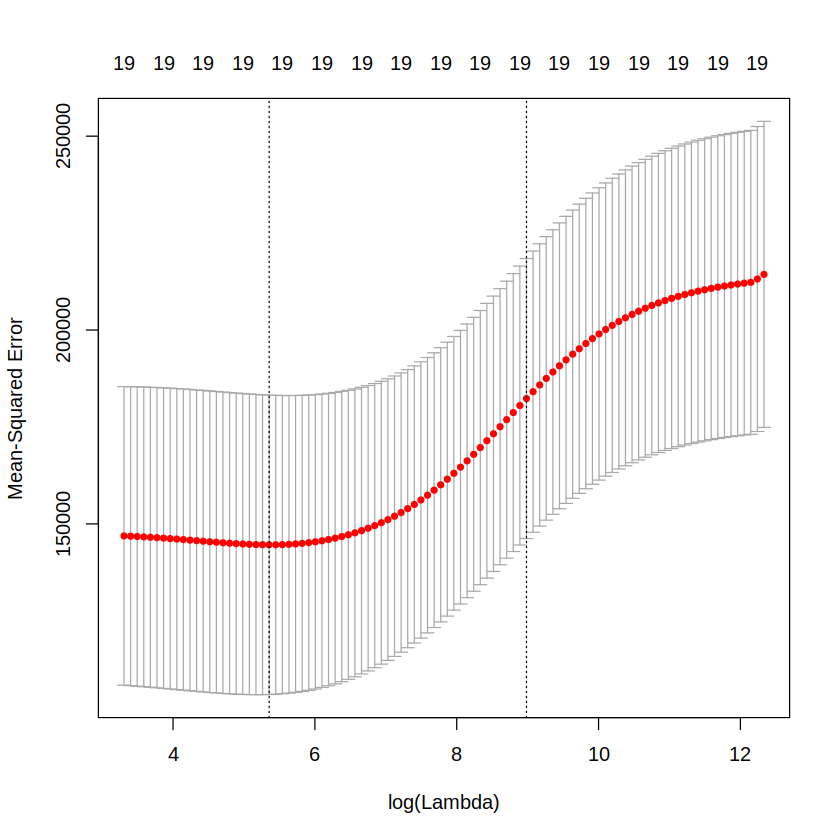

In [167]:
set.seed(1);
err = cv.glmnet(x[train,], y[train], alpha=0);
plot(err)

In [168]:
err$lambda.min

[1] 211.7416

In [169]:
pred = predict(m, s=err$lambda.min, newx=x[test,]);
mean((pred - y[test])^2)

[1] 96015.51

In [171]:
predict(glmnet(x, y, alpha=0), s=err$lambda.min, type="coefficients");

20 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)   9.88487157
AtBat         0.03143991
Hits          1.00882875
HmRun         0.13927624
Runs          1.11320781
RBI           0.87318990
Walks         1.80410229
Years         0.13074383
CAtBat        0.01113978
CHits         0.06489843
CHmRun        0.45158546
CRuns         0.12900049
CRBI          0.13737712
CWalks        0.02908572
LeagueN      27.18227527
DivisionW   -91.63411282
PutOuts       0.19149252
Assists       0.04254536
Errors       -1.81244470
NewLeagueN    7.21208394

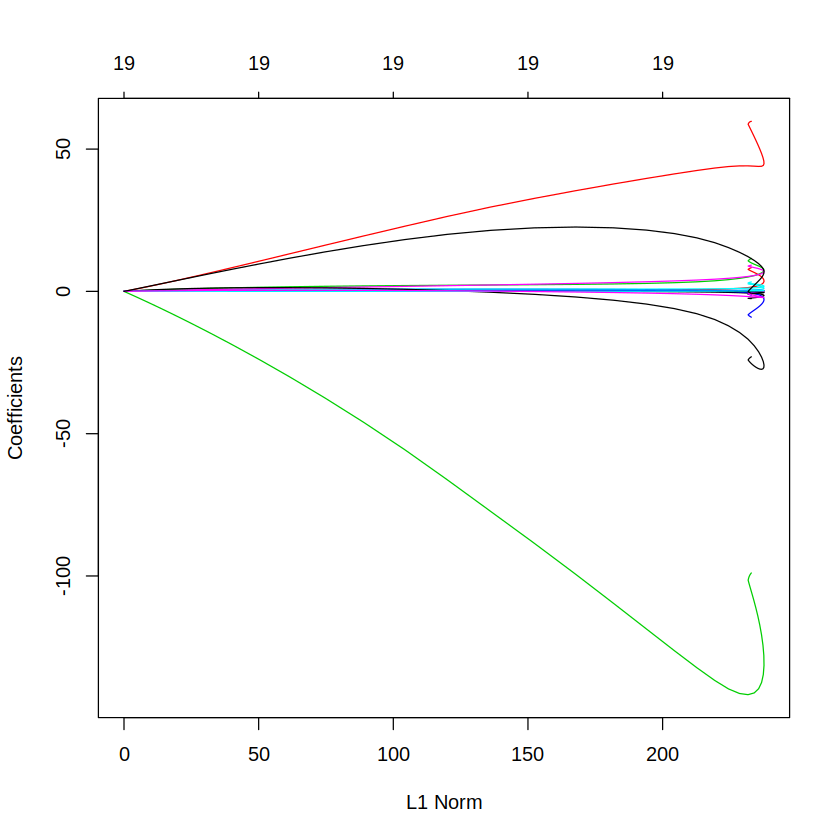

In [172]:
plot(m)

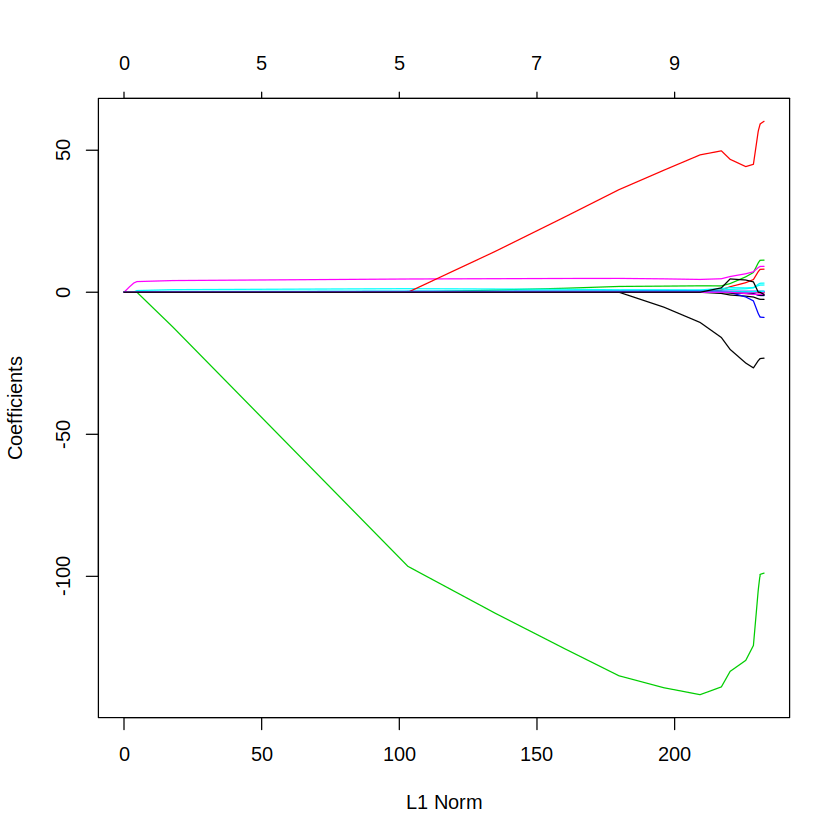

In [173]:
m = glmnet(x[train,], y[train], alpha=1, lambda=grid);
plot(m)

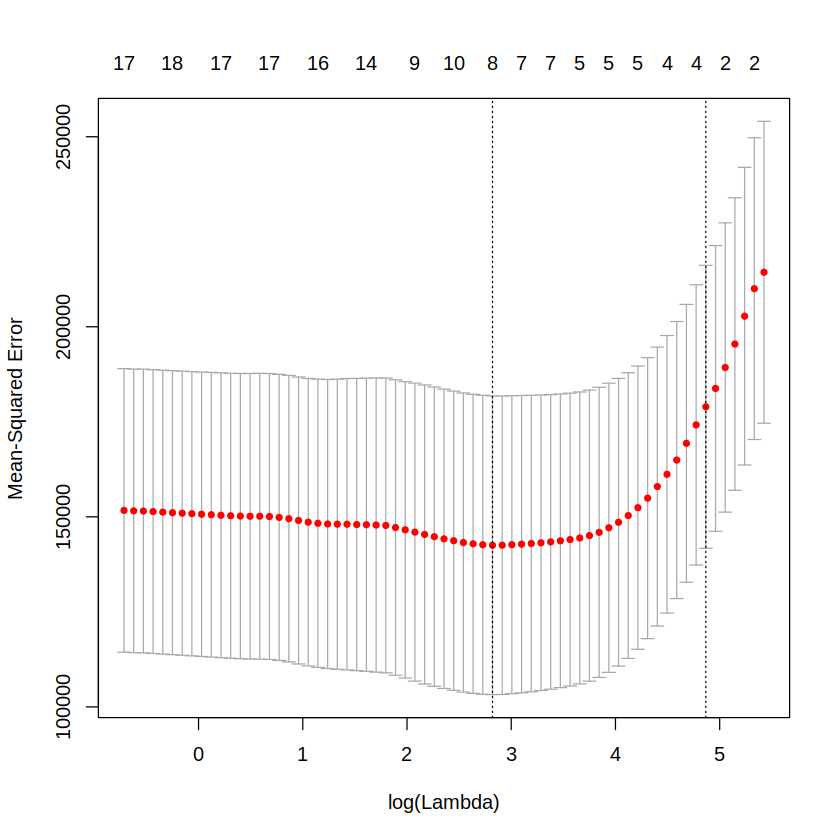

In [174]:
set.seed(1);
err = cv.glmnet(x[train,], y[train], alpha=1);
plot(err)

In [175]:
pred = predict(m, s=err$lambda.min, newx=x[test,]);
mean((pred - y[test])^2)

[1] 100743.4

In [177]:
predict(glmnet(x, y, alpha=1), s=err$lambda.min, type="coefficients");

20 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)   19.5223995
AtBat          .        
Hits           1.8701714
HmRun          .        
Runs           .        
RBI            .        
Walks          2.2187934
Years          .        
CAtBat         .        
CHits          .        
CHmRun         .        
CRuns          0.2072852
CRBI           0.4127984
CWalks         .        
LeagueN        1.7591970
DivisionW   -103.5051402
PutOuts        0.2206884
Assists        .        
Errors         .        
NewLeagueN     .        

In [182]:
set.seed(2);
m = pcr(Salary ~ ., data=hitters, scale=T, validation="CV");
summary(m)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    348.9    352.2    353.5    352.8    350.1    349.1
adjCV          452    348.7    351.8    352.9    352.1    349.3    348.0
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       349.6    350.9    352.9     353.8     355.0     356.2     363.5
adjCV    348.5    349.8    351.6     352.3     353.4     354.5     361.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        355.2     357.4     347.6     350.1     349.2     352.6
adjCV     352.8     355.2     345.5     347.6     346.7     349.8

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

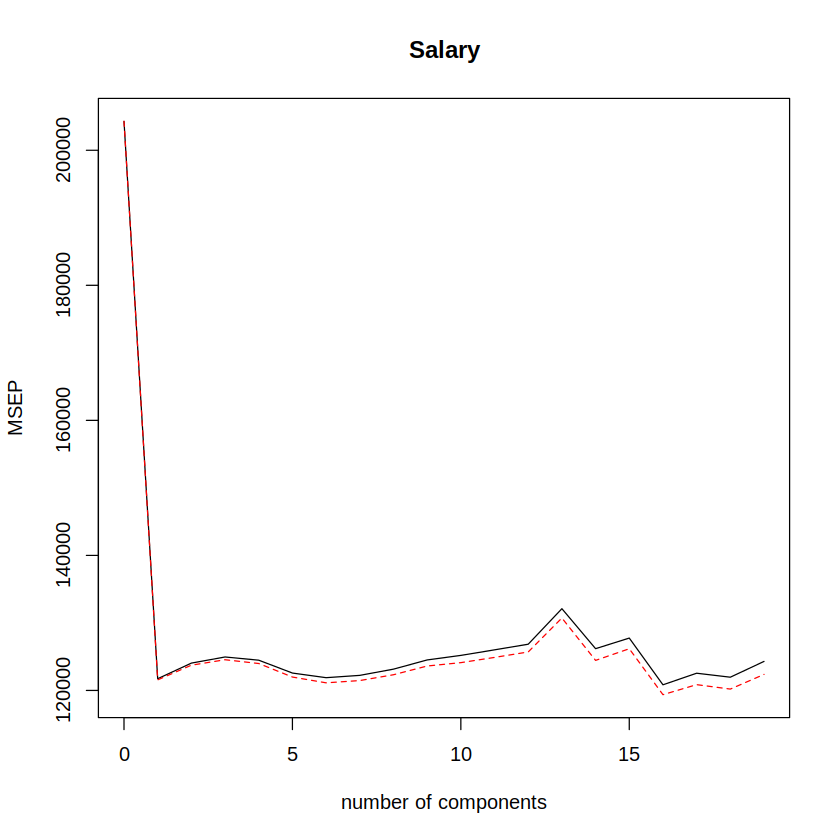

In [183]:
validationplot(m, val.type="MSEP")

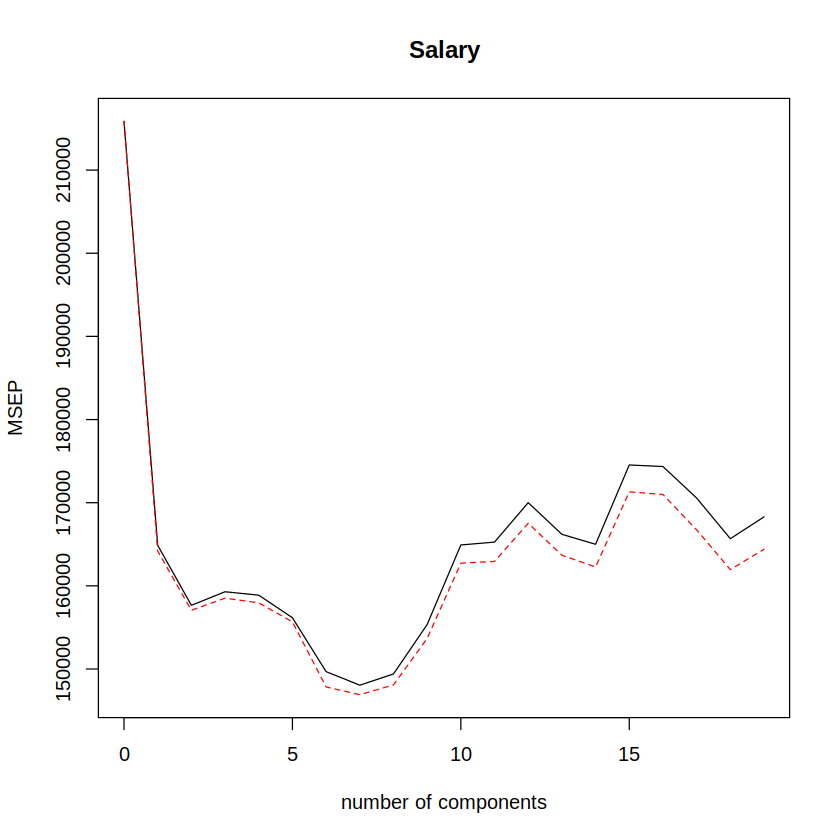

In [185]:
set.seed(1);
m = pcr(Salary ~ ., data=hitters, scale=T, subset=train, validation="CV");
validationplot(m, val.type="MSEP")

In [186]:
pred = predict(m, x[test,], ncomp=7);
mean((pred - y[test])^2)

[1] 96556.22

In [187]:
pcr_fit = pcr(y ~ x, scale=T, ncomp=7);
summary(pcr_fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 7
TRAINING: % variance explained
   1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X    38.31    60.16    70.84    79.03    84.29    88.63    92.26
y    40.63    41.58    42.17    43.22    44.90    46.48    46.69


Data: 	X dimension: 131 19 
	Y dimension: 131 1
Fit method: kernelpls
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           464.6    394.2    391.5    393.1    395.0    415.0    424.0
adjCV        464.6    393.4    390.2    391.1    392.9    411.5    418.8
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       424.5    415.8    404.6     407.1     412.0     414.4     410.3
adjCV    418.9    411.4    400.7     402.2     407.2     409.3     405.6
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        406.2     408.6     410.5     408.8     407.8     410.2
adjCV     401.8     403.9     405.6     404.1     403.2     405.5

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.12    53.46    66.05    74.49    79.33    84.56    87.09    90.74
Salary 

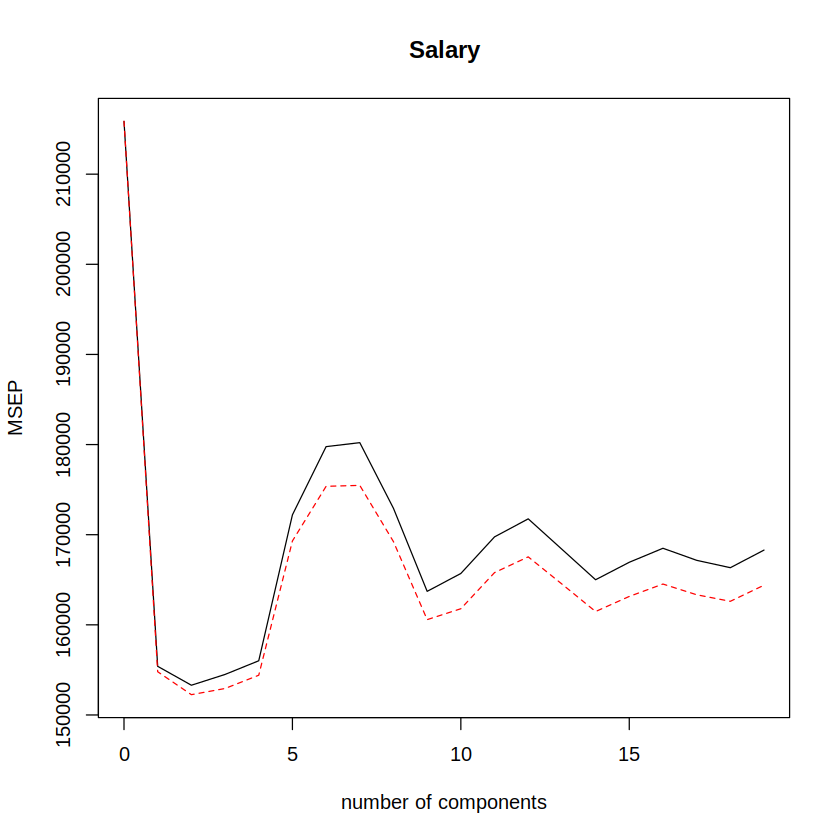

In [190]:
set.seed(1);
m = plsr(Salary ~ ., data=hitters, scale=T, subset=train, validation="CV");
validationplot(m, val.type="MSEP");
summary(m)

In [191]:
pred = predict(m, x[test,], ncomp=2);
mean((pred - y[test])^2)

[1] 101417.5

In [193]:
pls_fit = plsr(y ~ x, scale=T, ncomp=2);
summary(pls_fit)

Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: kernelpls
Number of components considered: 2
TRAINING: % variance explained
   1 comps  2 comps
X    38.08    51.03
y    43.05    46.40
